# Some Standardized shocks to illustrate the main macroeconomic features of the model

This notebook performs a set of standard macroeconomic shocks on a model and displays results.  It can be used to verify the good functioning of the model and also illustrates nicely how to perform simulations on World Bank models in python using the `modelflow` package.

The simulations performed are:

* 5 separate fiscal stimulus shocks equal to 1 percent of *ex ante* GDP.  These can be used to compare fiscal multipliers and the impacts of different kinds of stimulus on GDP, potential GDP, consumption and inflation
    * a 1 percent of GDP decrease in indirect taxes
    * a 1 percent of GDP decrease in direct taxes
    * a 1 percent of GDP increase in government spending on goods and services
    * a 1 percent of GDP increase in government spending on investment goods
    * a 1 percent of GDP increase in government spending on transfers to households
* 4 non-fiscal shocks were also run
    * a temporary one-year 1 percent increase in the monetary policy interest rate;
    * a permanent 10 percent depreciation of the currency
    * a permanent one percent increase in total factor productivity;
    * a permanent \$20 increase in the price of crude oil

**Note**
This Notebook is designed to be run on any World Bank model. To customize the notebook to run on a different model, the string variable (`Cty`), which is defined in section 1.1 will have to be changed to take the value of the Mnemonic of the country to be simulated. Similarly the location of the file containing the model may have to be revised.   While  the World Bank mnemonics are the same across countries, not all countries report all variables.  As a result for some models, some variable names (notably those of shocked variables or the expenditure variables being held constant) may need to be revised. Otherwise the Notebook should run without change on any World Bank model.


## Set up python environment and load model object

To work with modelflow we must first import the python libraries that we wish to work with and then instantiate the model object, which we have chose to call `themodel`;

In [1]:
from modelclass import model

no update sheets No module named 'ipydatagrid'
No modelwidgets


In [2]:
#Jupyter notebook code that improves the look of the executed notebook
%load_ext autoreload
%autoreload 2

In [ ]:
#This is code to manage dependencies if the notebook is executed in the Google Colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb   ')


In [3]:
#Set this variable to the three-letter ISO of the country whose model is being simulated
cty="HRV" 
# Models downloaded from the World Bank web site using the model.download_github_repo(reset=1) method of modelflow and
# executing this file from the local version of the file stored on their computer shuold not have to changethe filepath varible
filepath=f'data/{cty}'
themodel,bline = model.modelload(filepath,run=True,keep='Baseline',silent=True)



Zipped file read:  data\HRV.pcim


## Add an equation to correctly calculate the debt to GDP ratio

In the Croatia model the debt variable is annualized in the sense that the annual debt is the average of the debt number for the four quarters.  But GDP is quarterly in the sense that annual GDP is the sum of the four quarters.

For modelflow's standard reporting routines which would divide the debt by GDP to get a debt to GDP ratio this results in a number four times larger than it should be.

Below we generate a new variable `HRVGGDBTTOTLCN_` that is the simple ratio divided by 4.




In [4]:
# Use the .equ_update() method to modify the model.

#themodel,bline = themodel.equpdate(f'{cty}GGDBTTOTLCN_ = ({cty}GGDBTTOTLCN/({cty}NYGDPMKTPKN*4)*100',add_add_factor=False,calc_add=False)

## Prepare the simulations

For each shock a separate dataframe is created. Each of these dataframes is given a name that evokes the shock to be performed. Then each dataframe is modified to reflect the shock that is to be performed.

Following the creation of the dataframes the shocks will be performed and the results stored using the `keep=` syntax of model flow.

### Fiscal policy shocks

The two lines below can be commented out.  They are here to generate a list of all variables in the model that start GGEXP (general government expenditure) and GGREV (general governent revenues) and that end CN (millions of current local currency units). As fiscal accounts tend to differ across countries these variables are often different across models.


In [5]:

themodel['???GGEXP*CN'].des #Uncomment to get list of mnemonics and descriptions for government expenditures
#themodel['???GGREV*CN'].des #Uncomment to get list of mnemonics and descriptions for government revenues

HRVGGEXPCAPTCN : General government expenditure on capital expenditure (millions lcu)
HRVGGEXPCOEPCN : 10. Compensation of employees
HRVGGEXPCRNOCN : 14. Other current expenditure
HRVGGEXPCRNTCN : General government Current Expenditures (millions lcu)
HRVGGEXPGFCFCN : 17. Gross fixed capital formation
HRVGGEXPGNFSCN : General government expenditure on goods and services (millions lcu)
HRVGGEXPINTPCN : General government interest payments on public debt (millions lcu)
HRVGGEXPKDISCN : Acquisitions less disposals of non-produced non-financial assets
HRVGGEXPKINVCN : General Government Capital Investments (millions LCU)
HRVGGEXPKOTHCN : 18. Other capital expenditure
HRVGGEXPKTRNCN : General Government Capital Transfers (millions LCU)
HRVGGEXPSBENCN : Social benefits other than social transfers in kind
HRVGGEXPSKINCN : Social transfers in kind - purchased market production
HRVGGEXPSSOCCN : 11. Social contributions and benefits
HRVGGEXPSUBSCN : 13. Subsidies
HRVGGEXPTOTLCN : General governm

#### Create an expenditures string

The fiscal scenarios below exogenize (hold constant) spending on those elements of government spending that are not being directly shocked.

To facilitate that, the variable `GGexp` is assigned a string containing all of the expenditure variables that are to be held constant.  This variable is then used when setting up each of the fiscal shocks below. 

This list may need to be adjusted from model to model.

In [6]:
# Government spending variables to be held constant
# These were copied from the above listing
# Note use of \ top continue line

GGexp=(
    'HRVGGEXPGFCFCN HRVGGEXPCOEPCN HRVGGEXPCRNOCN HRVGGEXPGNFSCN HRVGGEXPKDISCN HRVGGEXPKTRNCN HRVGGEXPSBENCN'
    ' HRVGGEXPSSOCCN HRVGGEXPSUBSCN HRVGGEXPGFCFCN  HRVGGEXPKOTHCN')

#Remove duplicates
GGexp = ' '.join(set(GGexp.split(' ')))

## The fiscal shocks

As indicated above 5 separate fiscal shocks each designed to stimulate the economy by 1 percent of GDP in ex ante terms are prepared and executed.

### The Indirect tax cut

This shock assumes that the main elements of government spending are held constant at their pre-shock levels.  This assumption could be relaxed by commenting out the second line. 

In the model, indirect taxes are determined as a function of their  effective tax rate.  For this shock we only want to shock domestic indirect taxes (not external ones).

Below the equations for indirect taxes on Goods and services. Excise taxes also constitute an indirect tax, but as the Goods and services represent a bit less than 80 percent of the total we focus on these.


In [7]:
themodel[f'{cty}GGREVGNFSCN'].eviews

HRVGGREVGNFSCN : 
@IDENTITY HRVGGREVGNFSCN  = (HRVGGREVGNFSER  / 100)  * (HRVNECONPRVTCN  + HRVNECONGOVTCN)


Inspecting the equations, one notes that the level is defined as the product of an effective rate of taxation (`HRVGGREVGNFSER`) times a tax base -- the sum of Private and Government consumption spending `(HRVNECONPRVTCN  + HRVNECONGOVTCN)`.


To prepare the simulation we first prepare a new `DataFrame`that is a copy of the baseline `DF`, and then exogenize the GGexp variables using the `.fix()`method.



In [8]:
fpol_indirect=bline.copy()
fpol_indirect=themodel.fix(bline,f'{GGexp}') # Freeze other spending levels
fpol_indirect['HRVGGREVGNFSER'].loc['2023Q1':'2025q4'] #display the effective rate on goods and services over two years

The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN


2023Q1    17.443762
2023Q2    17.443762
2023Q3    17.443762
2023Q4    17.443762
2024Q1    17.443762
2024Q2    17.443762
2024Q3    17.443762
2024Q4    17.443762
2025Q1    17.443762
2025Q2    17.443762
2025Q3    17.443762
2025Q4    17.443762
Freq: Q-DEC, Name: HRVGGREVGNFSER, dtype: float64

We want to decrease the  effective rate so that revenues decrease by 1 percent of GDP (ex ante).  We can calculate the new effective rate as the existing revenues - 1 percent of GDP times the base.


In [9]:
                                   
#Now calculate the ex ante deltas in revenues as 1% ofr GDP times their share in total IDRT revenues
fpol_indirect=fpol_indirect.mfcalc(
    f'<2025 2050> {cty}GGREVGNFSER = 100*({cty}GGREVGNFSCN - .01 * \
    {cty}NYGDPMKTPCN)/({cty}NECONPRVTCN  + {cty}NECONGOVTCN)')    
  

In [10]:
#solve the model.
tempdf = themodel(fpol_indirect,silent=1,keep=f'1 % of GDP Indirect tax cut')

### Direct tax cut of 1 % of GDP

The same basic methodology is followed for  direct taxes (Corporate and personal income taxes).


In [11]:
themodel[f'{cty}GGREV*ITTCN'].eviews

HRVGGREVCITTCN : 
@IDENTITY HRVGGREVCITTCN  = (HRVGGREVCITTER  / 100)  * HRVnygdpmktpcn
  
HRVGGREVPITTCN : 
@IDENTITY HRVGGREVPITTCN  = (HRVGGREVPITTER  / 100)  * HRVNYYWBTOTLCN


In [12]:
themodel['HRVGGREVCITTER HRVGGREVPITTER'].df.loc['2023Q1':'2025q4']

,HRVGGREVCITTER,HRVGGREVPITTER
2023Q1,2.58678,7.010513
2023Q2,2.58678,7.010513
2023Q3,2.58678,7.010513
2023Q4,2.58678,7.010513
2024Q1,2.58678,7.010513
2024Q2,2.58678,7.010513
2024Q3,2.58678,7.010513
2024Q4,2.58678,7.010513
2025Q1,2.58678,7.010513
2025Q2,2.58678,7.010513


In [13]:
fpol_direct=bline.copy()
fpol_direct=themodel.fix(bline,f'{GGexp}') # Freeze spending levels Capital

# In the model direct taxes (personal and corporate income taxes) tax are 
# determined by the lagged effective rate of taxation.  Shocking the 
# level of tax revenues in 2025 by one percent of GDP decreases the effective 
# tax rate going forward by a constant amount consistent with a 1 percent decrease 
# in GDP and the tax base for direct taxes (.5% for each)

fpol_direct=fpol_direct.mfcalc(f'SUMCN = {cty}GGREVCITTCN +{cty}GGREVPITTCN ')
fpol_direct=fpol_direct.mfcalc(f'{cty}GGREVCITTCN_OLD={cty}GGREVCITTCN')
fpol_direct=fpol_direct.mfcalc(f'{cty}GGREVPITTCN_OLD={cty}GGREVPITTCN')

The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN


In [14]:
themodel['{cty}GGREVCITTCN {cty}GGREVPITTCN '].eviews

HRVGGREVCITTCN : 
@IDENTITY HRVGGREVCITTCN  = (HRVGGREVCITTER  / 100)  * HRVnygdpmktpcn
  
HRVGGREVPITTCN : 
@IDENTITY HRVGGREVPITTCN  = (HRVGGREVPITTER  / 100)  * HRVNYYWBTOTLCN


In [15]:
fpol_direct=fpol_direct.mfcalc(f'<2025Q1 2050Q4> {cty}GGREVCITTER = {cty}GGREVCITTER -0.5') # tax base is GDP
fpol_direct=fpol_direct.mfcalc(
    f'<2025Q1 2050Q4> {cty}GGREVPITTER = {cty}GGREVPITTER - \
    (0.5 * {cty}NYGDPMKTPCN / {cty}NYYWBTOTLCN)') #need to scale up because tax base is the wage bill



In [16]:
#solve the model.
tempdf = themodel(fpol_direct,silent=1,keep=f'1 % of GDP direct tax cut')#,start='2025Q1',end='2050Q4')

### Increase in expenditure on goods and services

The ex ante fiscal effort is the same in this scenario (1% of ex ante GDP) with the difference that it is implemented as an increase government spending, in this instance on goods and services.

First Government spending on goods and services is exogenized (along with the other expenditure variables) using the `.fix()` method.



In [17]:
fpol_ExpGS=bline.copy()
fpol_ExpGS=themodel.fix(bline,f'{GGexp}') # Exogenize spending levels including on G&S


fpol_ExpGS=fpol_ExpGS.mfcalc(
    f'<2025 2050> {cty}GGEXPGNFSCN_X ={cty}GGEXPGNFSCN_X   + .01*{cty}NYGDPMKTPCN') 


The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN


Then the model is solved.

In [18]:
#solve the model.
tempdf = themodel(fpol_ExpGS,silent=1,keep=f'1 % of GDP increase in G&S spending')


### Increase in expenditure on investment goods

The ex ante fiscal effort is the same in this scenario (1% of ex ante GDP), implemented as an increase in government spending on capital goods. 

Total capital spending fro the government accounts is broken down into Fixed investment `HRVGGEXPGFCFCN` and other capital spending in the Croatia model. We will shock he fixed investment variable.

Again the spending variable is at first exogenized, and then shocked by 1% of GDP and then the model is solved.


In [19]:
themodel.HRVGGEXPCAPTCN.eviews

@IDENTITY HRVGGEXPCAPTCN  = HRVGGEXPGFCFCN  + HRVGGEXPKOTHCN


In [20]:
fpol_ExpInv=bline.copy()
fpol_ExpInv=themodel.fix(bline,f'{GGexp} {cty}NECONGOVTCN') # Freeze spending levels 

fpol_ExpInv=fpol_ExpInv.mfcalc(f'<2025 2050> {cty}GGEXPGFCFCN_X ={cty}GGEXPGFCFCN_X   + .01*{cty}NYGDPMKTPCN')



The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN
HRVNECONGOVTCN


In [21]:
#solve the model.
tempdf = themodel(fpol_ExpInv,silent=1,keep=f'1 % of GDP increase in Govt investment spending')


### Increase in expenditure on Transfers to households

In this scenario the same fiscal effort is implemented as an increase in transfers to households.


In [22]:
fpol_ExpTrans=bline.copy()
fpol_ExpTrans=themodel.fix(bline,f'{GGexp}') # Freeze spending levels 

fpol_ExpTrans=fpol_ExpTrans.mfcalc(f'<2025 2050> {cty}GGEXPSBENCN_X ={cty}GGEXPSBENCN_X   + .01*{cty}NYGDPMKTPCN')



The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN


In [23]:
#solve the model.
tempdf = themodel(fpol_ExpTrans,silent=1,keep=f'1 % of GDP increase in transfers to households')
#themodel.lastdf['IDNNECONGOVTCN']/themodel.basedf['IDNNECONGOVTCN']



## Comparisons of results from the fiscal scenarios

The following charts compare results from the different fiscal simulations. Impacts will differ both in terms of their long-term and short-term impacts.  For example a scenario that increased investment would likely have negative impacts on consumption in the short-run but in the longer run could be expected to have an opposite impact on potential output, GDP and perhaps consumption.  A scenario that concentrated on transfers or consumption might have more of a short-term impact on demand but in the long run would have limited (and potentially negative impacts on output), especially if increased fiscal deficits and debt crowded out private sector investment.  As all World Bank models are customized to the country for which they have been built the extent of these effects can vary across models.


Recall the scenarios that were run by interrogating the keep_solutions dictionary.



In [24]:
for key,value in themodel.keep_solutions.items():
    print(key)

Baseline
1 % of GDP Indirect tax cut
1 % of GDP direct tax cut
1 % of GDP increase in G&S spending
1 % of GDP increase in Govt investment spending
1 % of GDP increase in transfers to households


no update sheets No module named 'ipydatagrid'


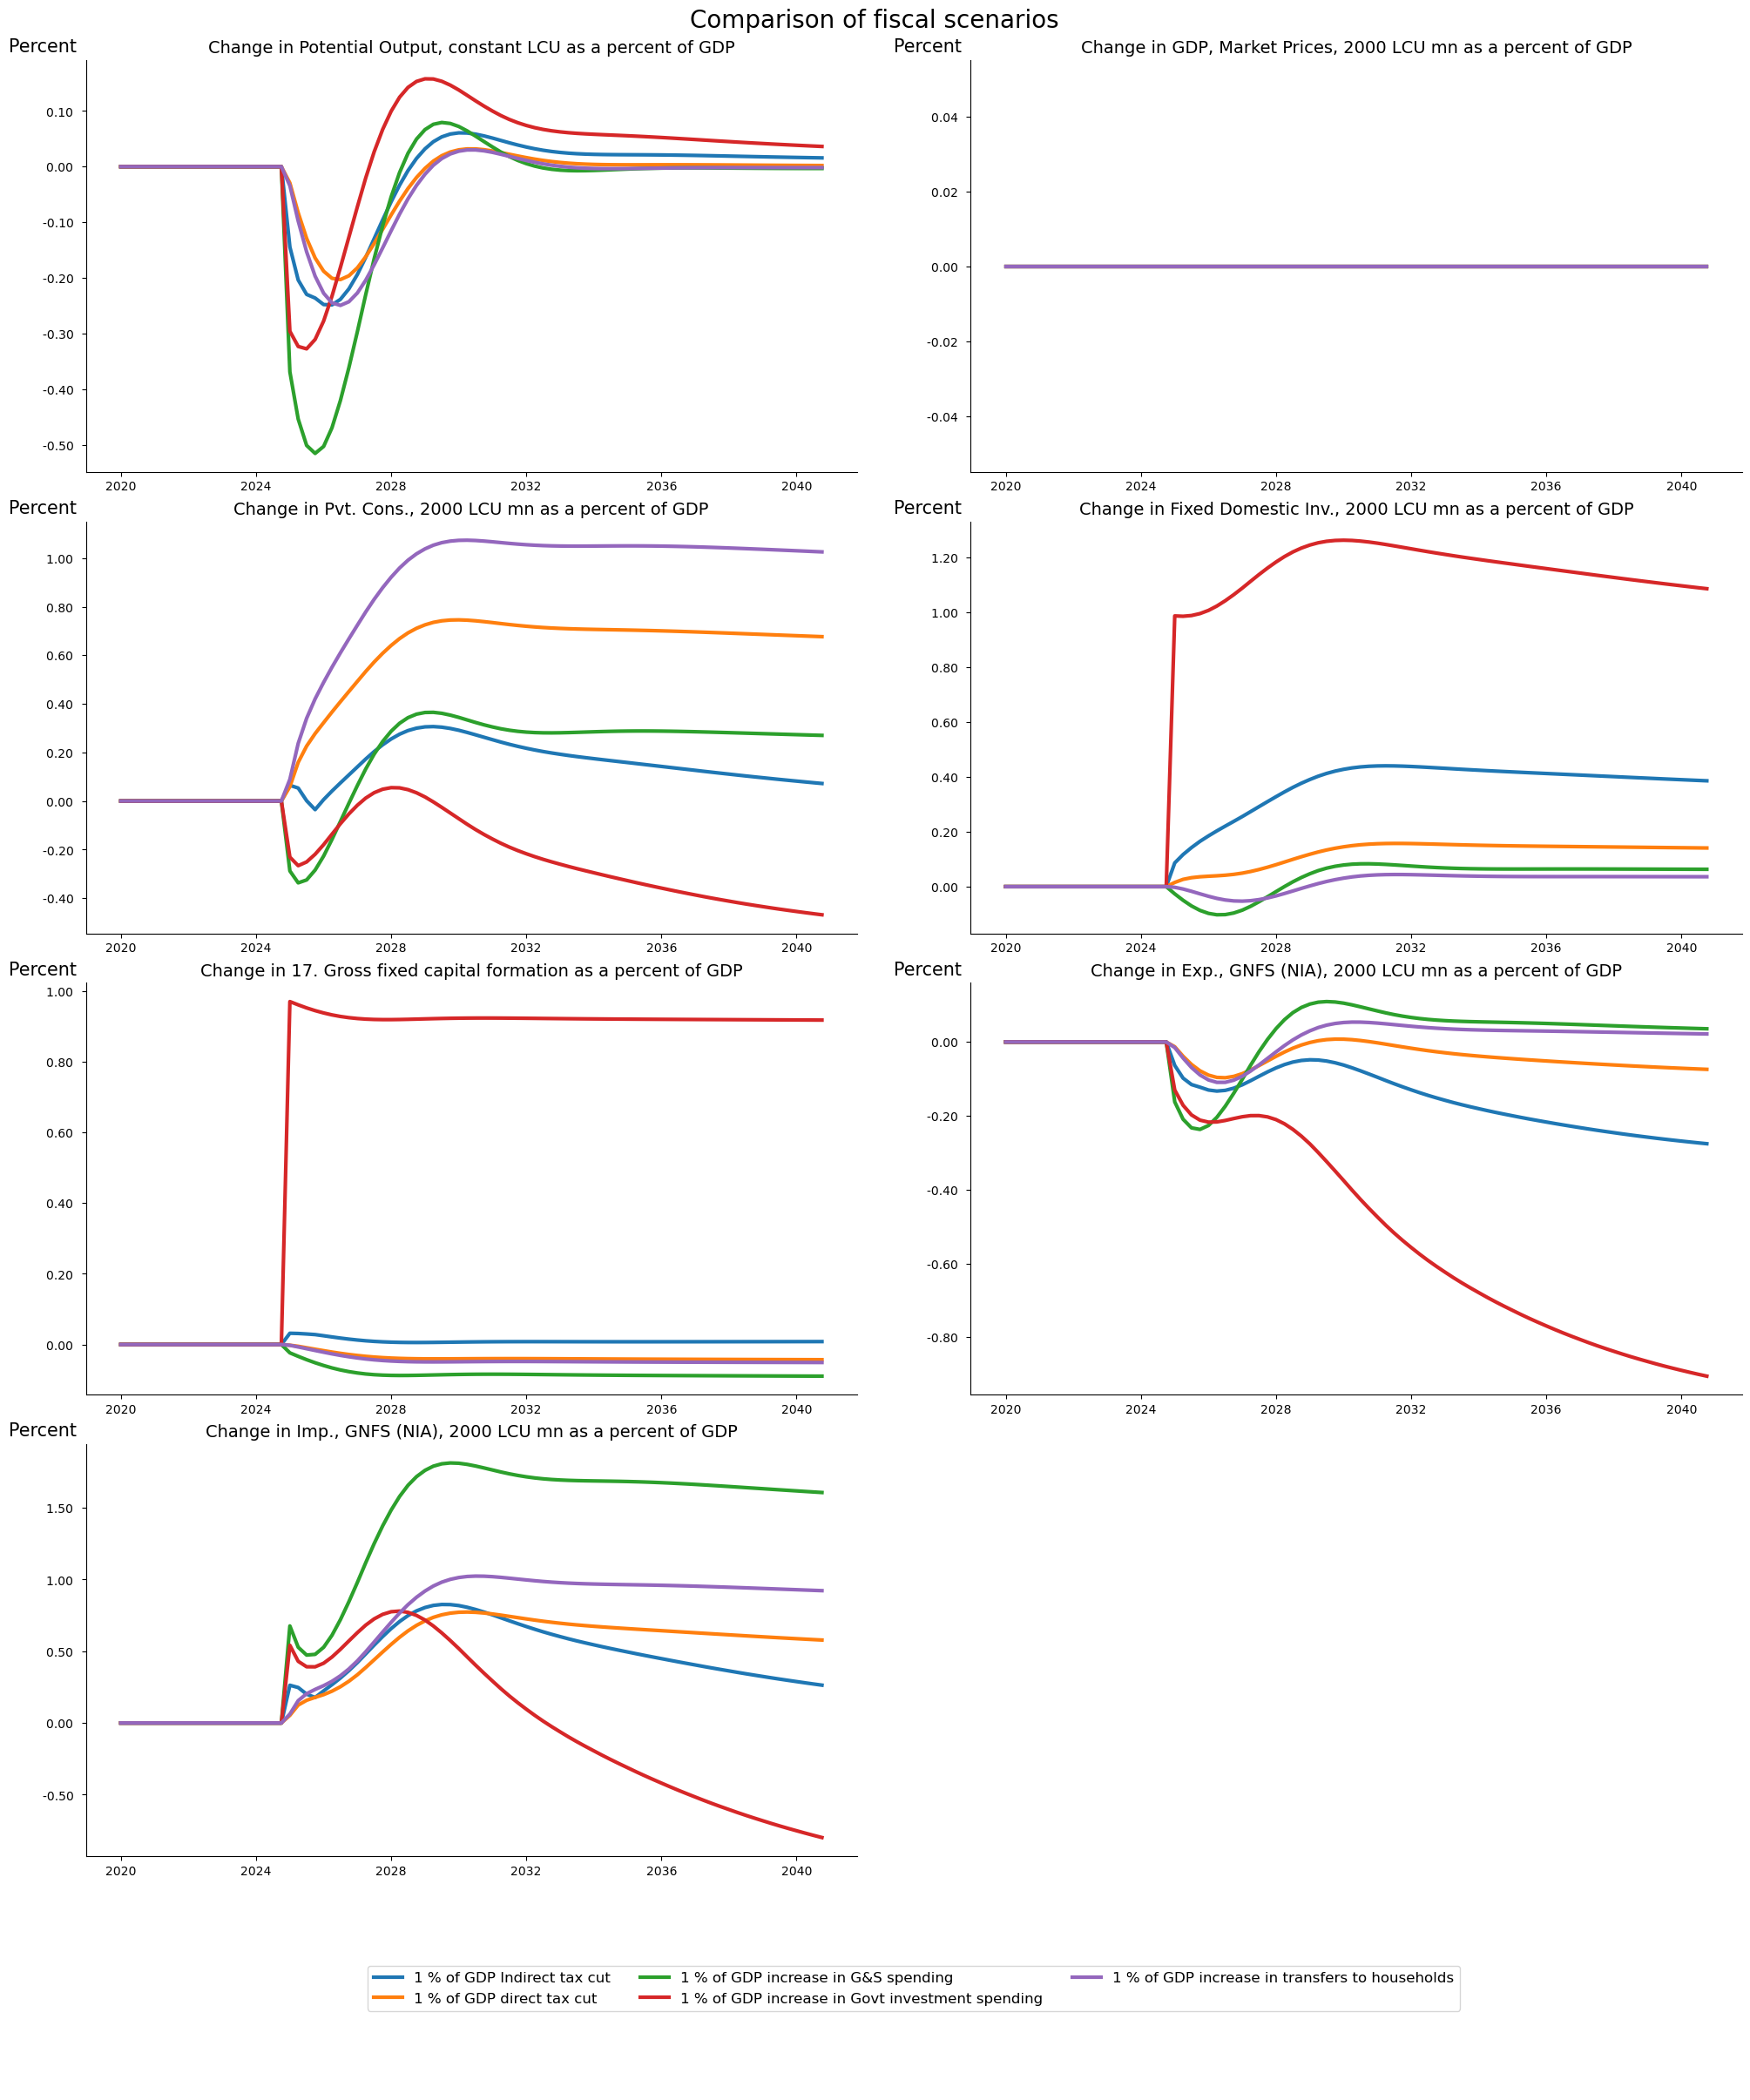

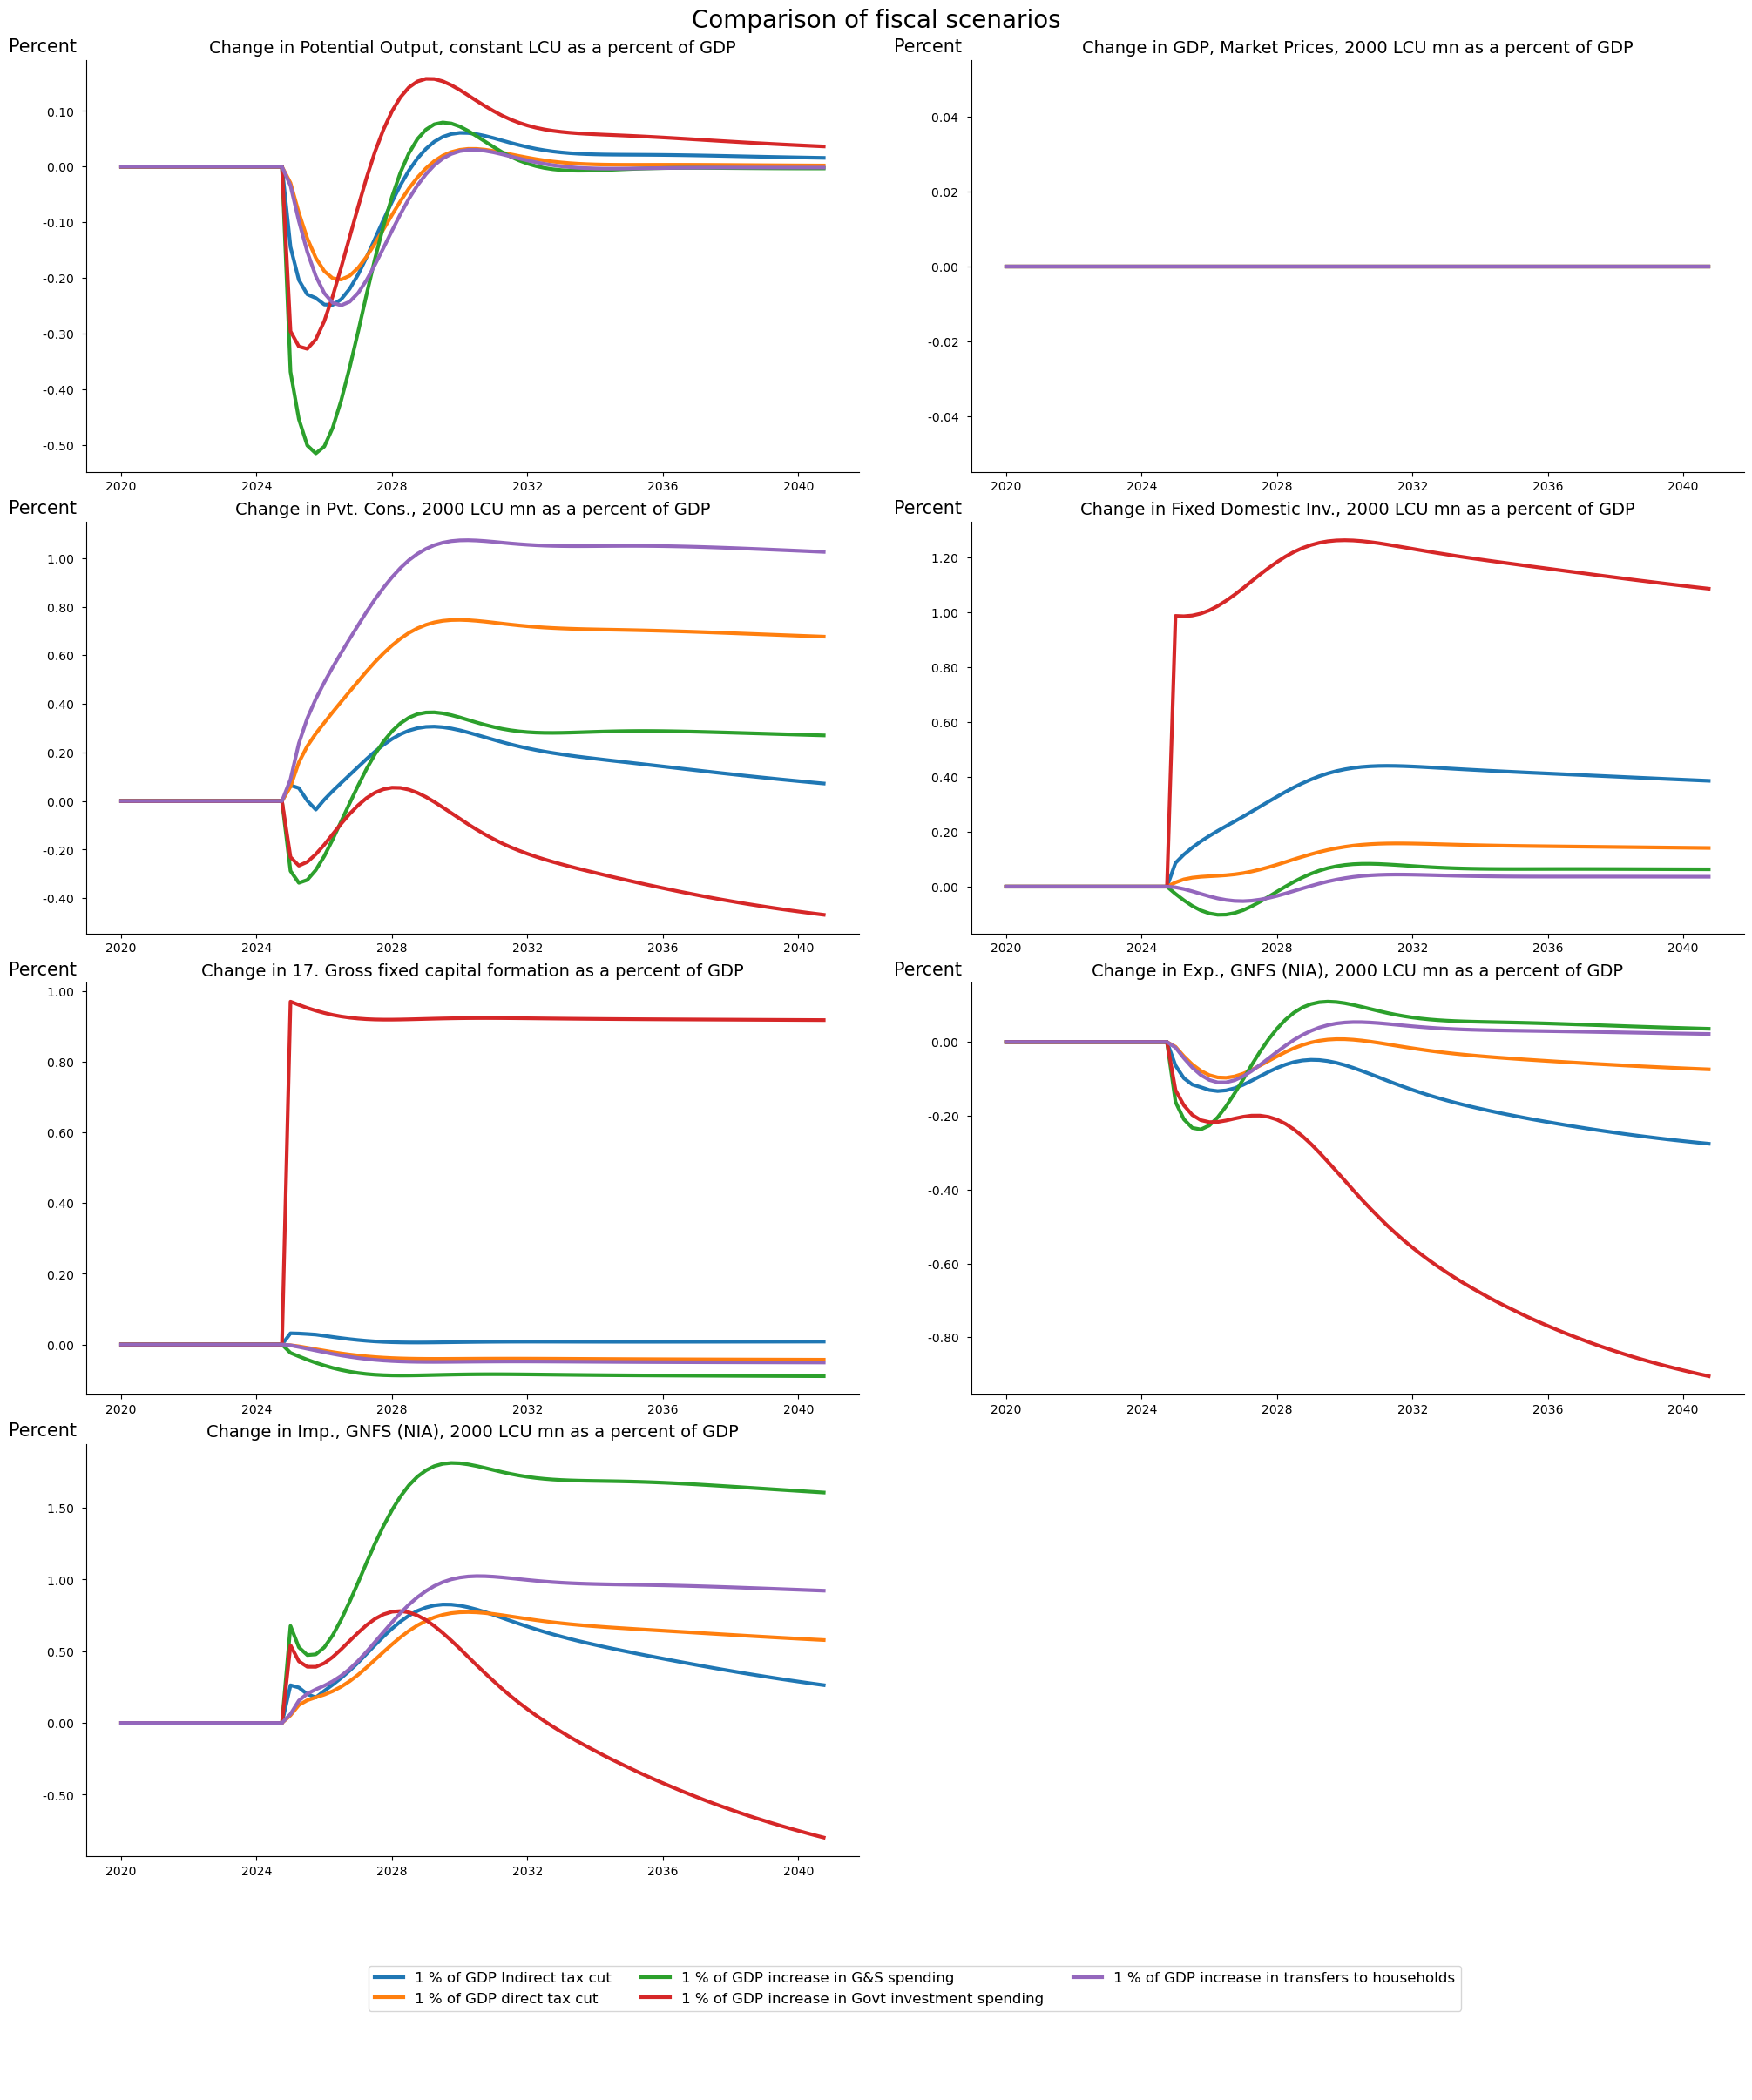

In [25]:
#scenarios_fiscal ='''Baseline|1 % of GDP Indirect tax cut|1 % of GDP direct tax cut|1 % of GDP increase in G&S spending|1 % of GDP increase in Govt investment spending|1 % of GDP increase in transfers to households'''
scenarios_fiscal = 'Baseline|'+\
                   '1 % of GDP Indirect tax cut|' +\
                   '1 % of GDP direct tax cut|'+\
                   '1 % of GDP increase in G&S spending|'+\
                   '1 % of GDP increase in Govt investment spending|'+\
                   '1 % of GDP increase in transfers to households'


vars=f'{cty}NYGDPPOTLKN {cty}NYGDPMKTPKN {cty}NECONPRVTKN {cty}NEGDIFTOTKN {cty}GGEXPGFCFCN\
       {cty}NEEXPGNFSKN {cty}NEIMPGNFSKN '
fig_expenditure_ = themodel.plot(vars,
                       scenarios = scenarios_fiscal,
                       smpl= ('2020q1','2040q4'),
                       datatype= 'difgdppct',
                       samefig=True,
                       legend=True,
                       # the ax_title_template can be used to customize the title associated with each sub figure in the grid
                       ax_title_template=
                         'Change in {var_description} as a percent of GDP',                        
                         #'Percent Change in {var_description} relative to baseline',                        
                       title="Comparison of fiscal scenarios")
fig_expenditure_.show

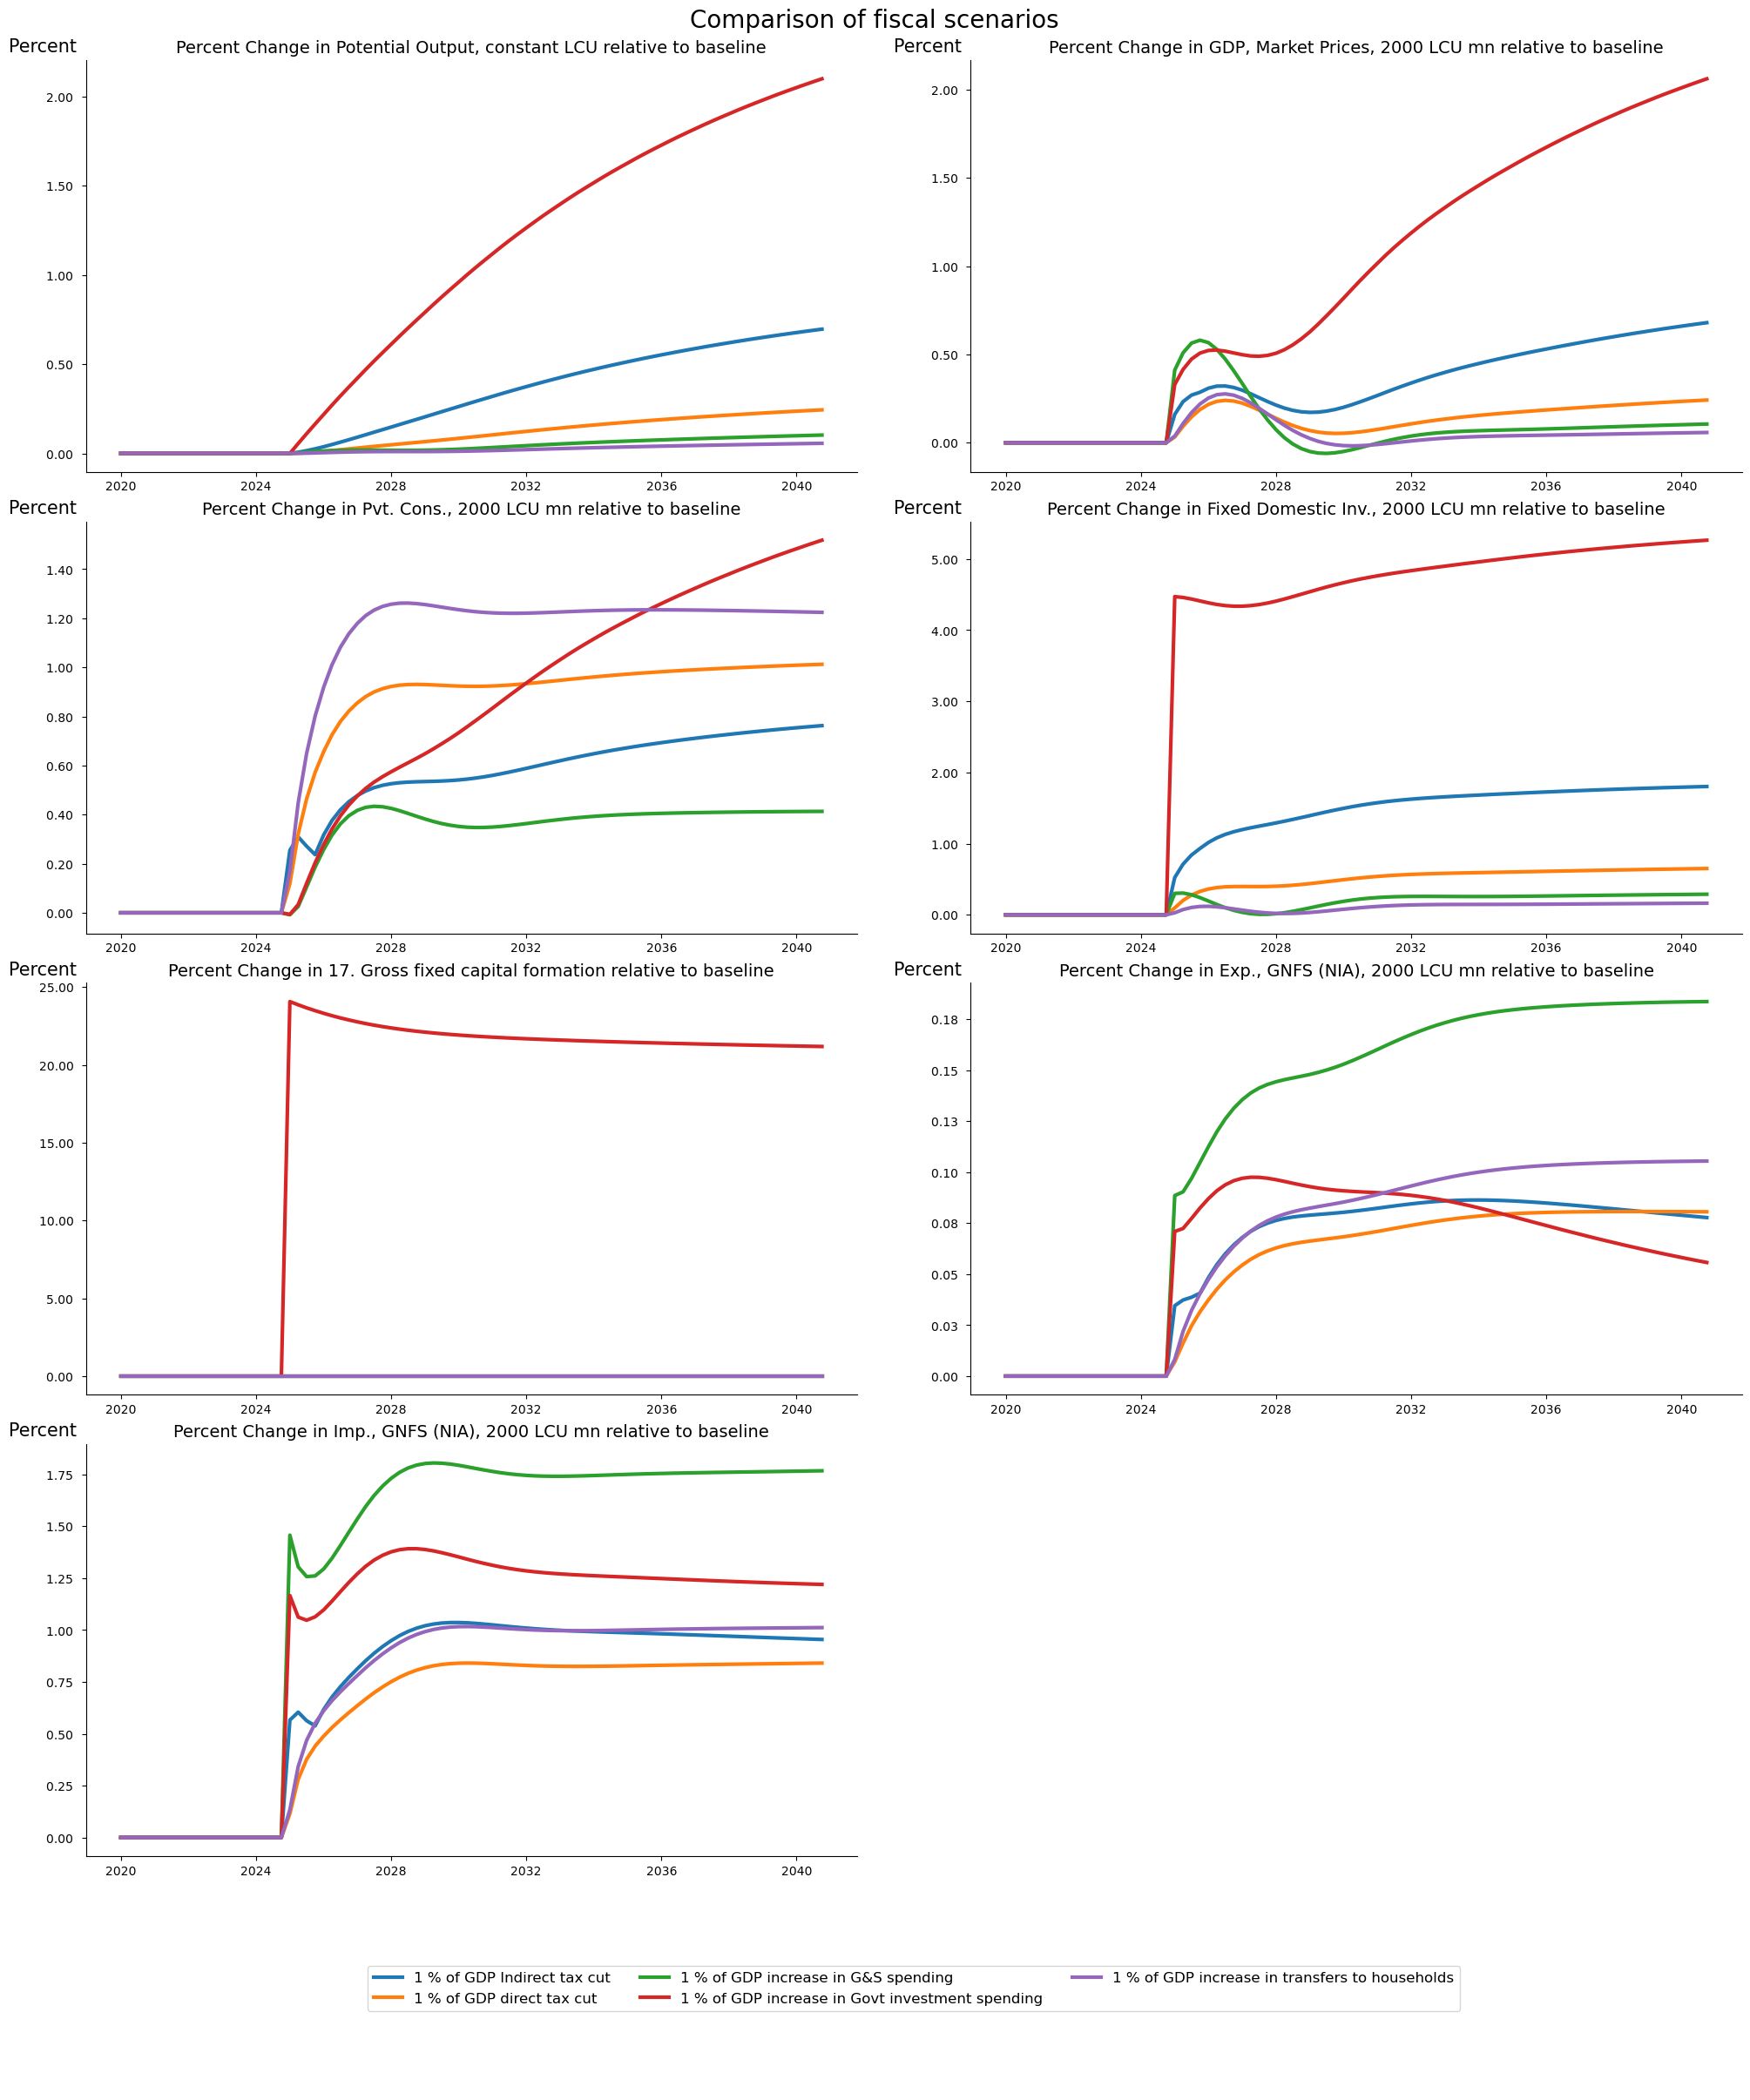

In [26]:
fig_expenditure = themodel.plot(vars,
                       scenarios = scenarios_fiscal,
                       smpl= ('2020q1','2040q4'),
                       datatype= 'difpctlevel',
                       samefig=True,
                       legend=True,
                       # the ax_title_template can be used to customize the title associated with each sub figure in the grid
                       ax_title_template=
                         #'Change in {var_description} as a percent of GDP',                        
                         'Percent Change in {var_description} relative to baseline',                        
                       title="Comparison of fiscal scenarios")
fig_expenditure.show


For Croatia, the GDP results appear to be consistent with expectations.  

Fiscal expansion of all types boosted demand and GDP in the short run.  However, in the long run, the impact depends on the impact of the fiscal spending on potential output.  
* Sustained increased investment spending served to increase the capital stock and contribute to higher potential and actual GDP.  While the initial demand-push effect dies out within a few years, over the long run the additional investment contributes to a sustained increase in potential output and GDP
* Spending that focused on consumption or transfers (green and purple lines)  has little discernible impact on potential and its demand impact therefore dies out fairly quickly. Transfers to households and decreased direct taxation tend to benefit households and consumption demand, although this impact declined over time due to the relative stability of potential output in these scenarios.  
* The cut in indirect taxes tended to generate small but persistent benefits, presumably due to lower prices for domestically produced goods with benefits to both exports and import competing goods.

### Impacts on the fiscal accounts

The following command shows the impacts on several of the main fiscal indicators.

In the example the custom_description option is used to provide pithier titles to variables.  These are only used in the `.plot()` call below and do not change the descriptions in the model object.

In [27]:
custom_description = {
    f'{cty}NECONPRVTXN': "Inflation",
    f'{cty}NYGDPMKTPCN': "Nominal GDP",
    f'{cty}GGEXPTOTLCN': "Government spending",
    f'{cty}GGEXPINTPCN': "Government interest payments",
    f'{cty}GGREVTOTLCN': "Government revenues",
    f'{cty}GGBALOVRLCN': "Fiscal balance",
    f'{cty}GGDBTTOTLCN_': "Public debt (% GDP)"
}


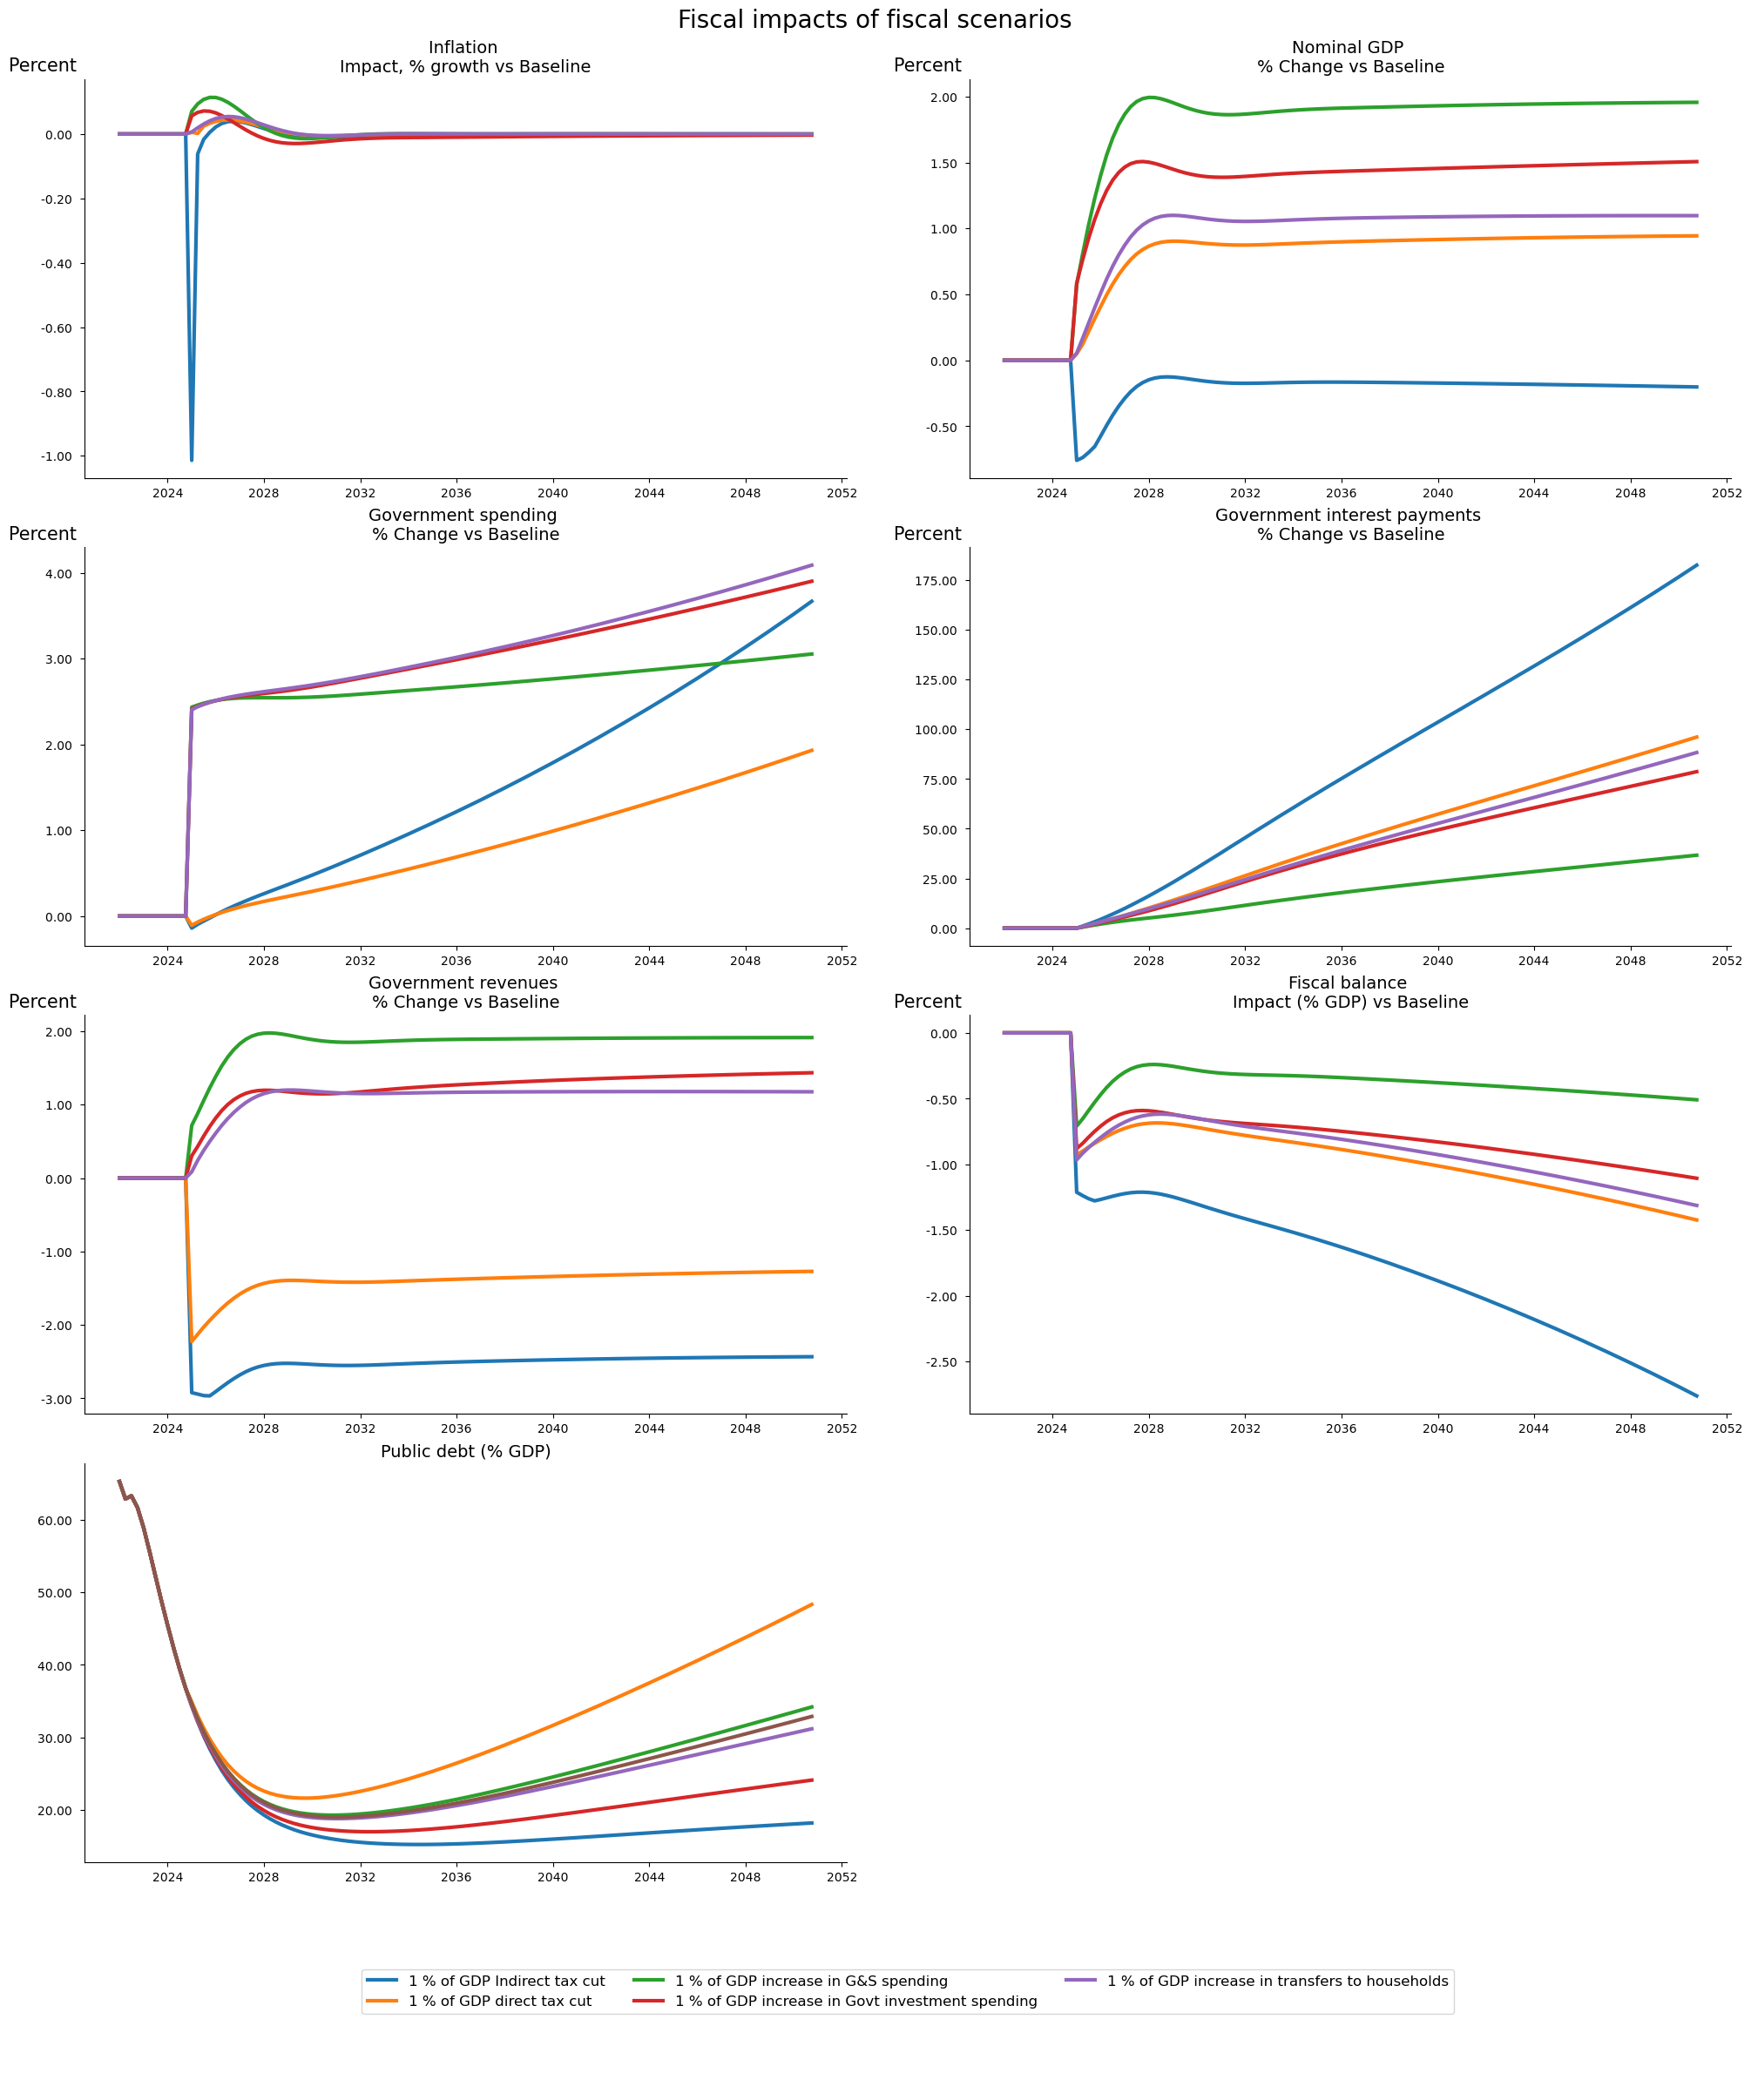

In [28]:
fig_public = themodel.plot(f'{cty}NYGDPMKTPCN {cty}GGEXPTOTLCN {cty}GGEXPINTPCN {cty}GGREVTOTLCN ',
                       scenarios = scenarios_fiscal, 
                       datatype= 'difpctlevel',
                       custom_description= custom_description,         
                       samefig=True,
                       legend=True,
                       title="Comparison of fiscal scenarios")
fig_deficit = themodel.plot(f'{cty}GGBALOVRLCN ',
                       scenarios = scenarios_fiscal, 
                       datatype= 'difgdppct',
                       custom_description= custom_description,         
                       samefig=True,
                       legend=True,
                       title="Fiscal impacts of fiscal scenarios") #last title of the series in combo is inherited by all
fig_debt = themodel.plot(f'{cty}GGDBTTOTLCN_',
                       scenarios = scenarios_fiscal, 
                       datatype= 'level',
                       custom_description= custom_description,         
                       samefig=True,
                       legend=True,
                       title="Fiscal impacts of fiscal scenarios") #last title of the series in combo is inherited by all
inflation = themodel.plot(f'{cty}NECONPRVTXN',
                       scenarios = scenarios_fiscal, 
                       datatype= 'difgrowth',
                       custom_description= custom_description,         
                       samefig=True,
                       legend=True,
                       title="Inflation impact");


combo= inflation |fig_public |fig_deficit|fig_debt
combo.show

Note that:
* All scenarios other than the indirect tax cut scenario (blue line) are inflationary in the short run. As the tax cuts and spending boosts each tend to pump up demand.  In the long run higher inflation serves to equalize demand and supply so inflation returns to its long run rate in line with expectations.  For the tax cut the process is reversed, the reduction in sales taxes reduces market prices and inflation increasing real incomes initially and stimulating demand. Over the longer run, this brings inflation back up to in line with long run expectations
* Nominal GDP is increased in all scenarios (except the indirect tax cut scenario), reflecting the inflationary impact of the scenario (most scenarios saw real GDP decline in the long-run).  Nominal GDP falls in the indirect tax cut scenario as market prices fall (and inflation declines) with the lower tax rates, but recovers to close to its baseline level.

* The fiscal account deteriorates in all scenarios as compared with the baseline.
    * Nominal spending increases even in the tax scenarios, but here the driver is increased interest payments as other elements of spending were held constant.
    * Although interest payments as a percent of their initial level are up a lot, the increase as a percent of GDP (see next set of charts is less pronounced).
    * Revenues improve in the spending scenarios because of higher nominal GDP.
    * The fiscal balance deteriorates (becomes more negative) with the extent of the deterioration smallest in the scenarios where real GDP growth is increasing or hit less hard.
    * Public debt is higher in all scenarios

#### Fiscal impacts as a percent of GDP

As observed, higher inflation (due to increased demand in the early years of the simulation) mean that revenues, expenditures and GDP are higher in the simulation scenarios.  

The following charts show the results as a percent of GDP.  Here the inflation influences both the numerator and the denominator, so just the net effect is drawn.


In [29]:
# New and shorter descriptions for the variables to display 
short_var_desc = {
    f'{cty}GGEXPTOTLCN': 'Total Expenditures',
    f'{cty}GGREVTOTLCN': 'Total Revenues',
    f'{cty}GGEXPINTPCN': 'Interest payments',
    f'{cty}GGBALOVRLCN': 'Fiscal Balance',
    f'{cty}GGDBTTOTLCN_': 'Public Debt (% GDP)'
}

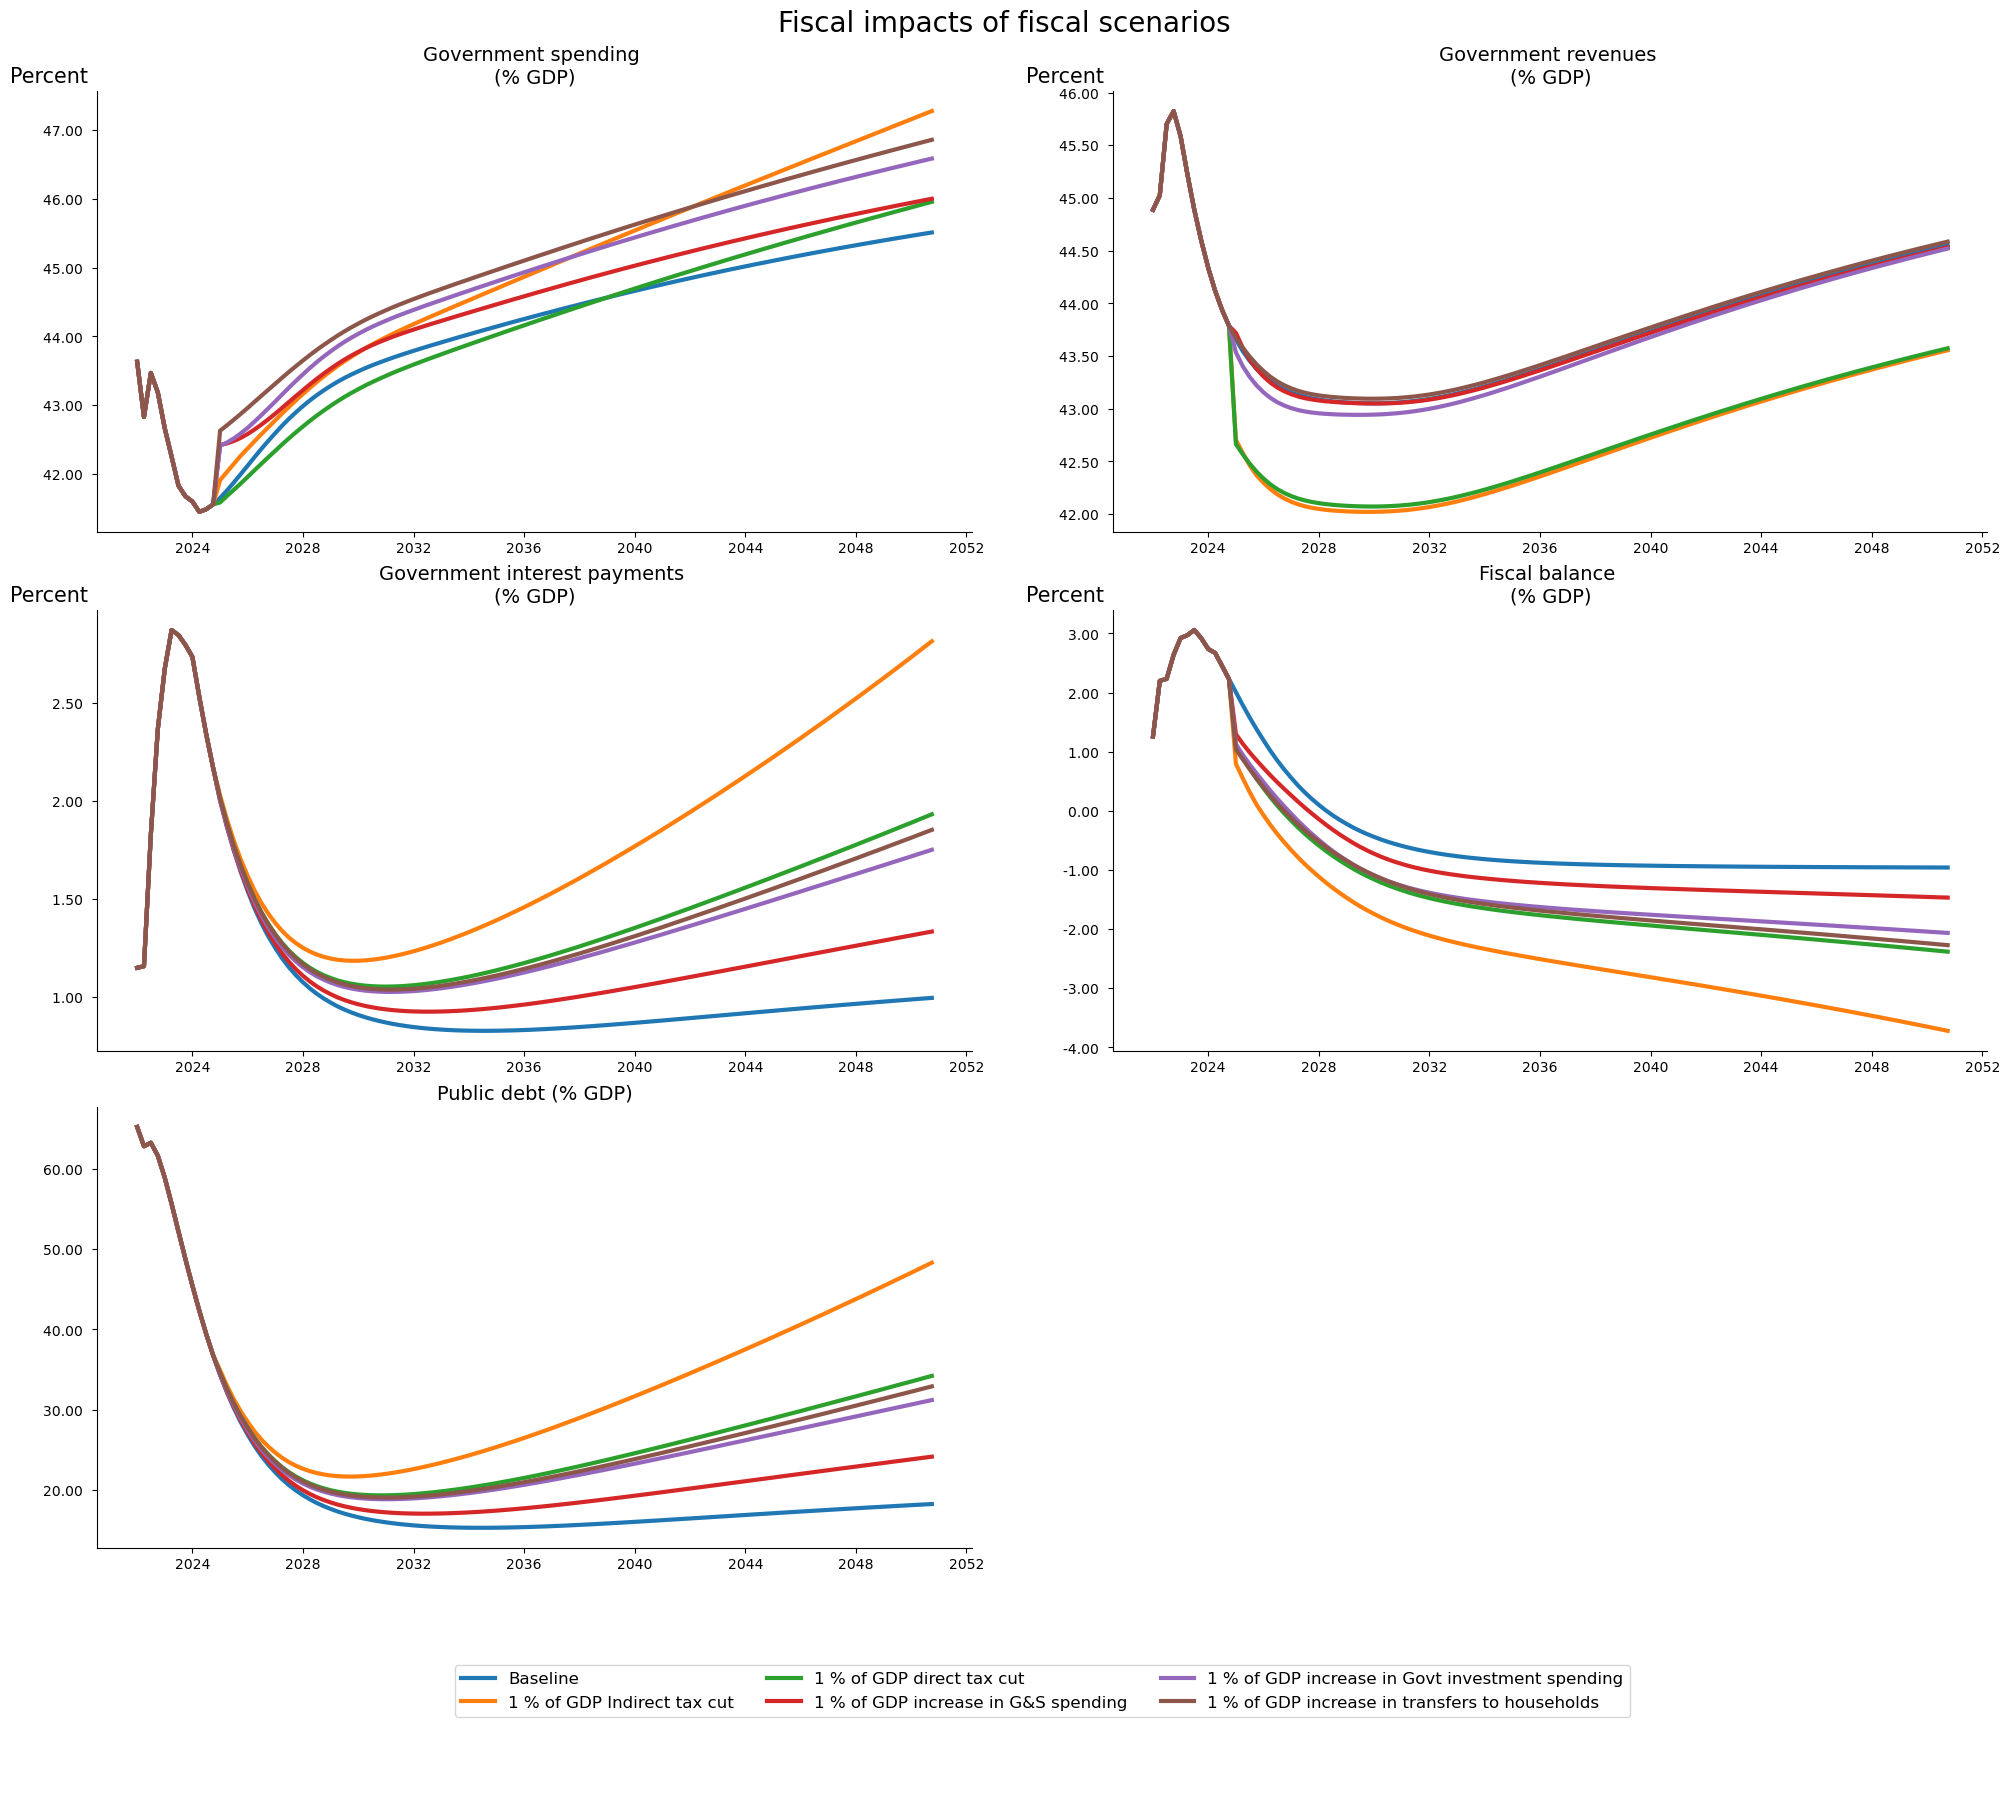

In [30]:

variables = f'{cty}GGEXPTOTLCN {cty}GGREVTOTLCN {cty}GGEXPINTPCN {cty}GGBALOVRLCN '

fig_gdp_pct = themodel.plot(
                        pat = variables,
                        scenarios=scenarios_fiscal, 
                        custom_description = short_var_desc,
                        datatype='gdppct',
                        name='Comparing fiscal stimulus impacts',
                        title="Comparing fiscal stimulus impacts",
                        samefig=True,
                        legend=True)

combo2=fig_gdp_pct|fig_debt

combo2.show


* Spending as a percent of GDP increases by as much as 2 percent of GDP, the result of the original bump up in spending plus increased interest payments as the debt rises.
* Revenues as a percent of GDP are down in the tax reduction scenarios, but up somewhat in the spending scenarios -- presumably reflecting a switch in the mix of total expenditure towards categories that are relatively highly taxed.
* Interest payments rise by as much as 3 percent of GDP by the end of the period due to higher debt levels and because of higher interest rates as debt to GDP rates rise.
* Higher debt and fiscal borrowing will translate into increased competition for domestic and foreign savings, crowding out private sector investment
* The fiscal balance deteriorates by one and three percent of GDP, with differences reflecting differences in real GDP and inflation impacts, and revenue impacts.
* Debt rises by more than 30 percent of GDP as the permanent 1 percent increase in spending accumulates over time.

## Non fiscal simulations

Three non-fiscal scenarios were run.  The first a temporary increase in the monetary policy interest rate, the second a 10 percent depreciation and the final a permanent $20 increase in the price of crude_petrol.

### Monetary policy shock

In this shock, it is assumed that the central bank raises its policy rate by 1 percentage point for 1 year.


In [31]:
Mpol=bline.copy()
Mpol=themodel.fix(bline,f'{GGexp}') # Freeze spending levels 

#Mpol=themodel.fix(Mpol,f'{cty}FMLBLPOLYFR','2025Q1' ,'2025Q4') # One year shock to MP but then let the equation take over.
Mpol=Mpol.mfcalc(f'<2025Q1 2025Q4> {cty}FMLBLPOLYFR ={cty}FMLBLPOLYFR   + 1')
#Mpol[f'{cty}FMLBLPOLYFR_X'].loc[2020:2030]/Mpol[f'{cty}FMLBLPOLYFR'].loc[2020:2030]

The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN


In [32]:
#solve the model.
tempdf = themodel(Mpol,silent=1,keep=f'1 ppt increase in policy rate in 2025')
#themodel.lastdf['IDNNECONGOVTCN']/themodel.basedf['IDNNECONGOVTCN']



In [33]:
themodel.lastdf[f'{cty}FMLBLPOLYFR'].loc['2024Q1':'2026Q4']-themodel.basedf[f'{cty}FMLBLPOLYFR'].loc['2024Q1':'2026Q4']

2024Q1    0.0
2024Q2    0.0
2024Q3    0.0
2024Q4    0.0
2025Q1    1.0
2025Q2    1.0
2025Q3    1.0
2025Q4    1.0
2026Q1    0.0
2026Q2    0.0
2026Q3    0.0
2026Q4    0.0
Freq: Q-DEC, Name: HRVFMLBLPOLYFR, dtype: float64

### Exchange rate depreciation

This shock assumes a depreciation of the currency by 10 percent in 2025.


In [34]:
Mpol_exr=bline.copy()


#Mpol_exr=themodel.fix(bline,f'{GGexp}') # Freeze spending levels 

In [35]:
themodel[f'{cty}PANUSATLS HRVPANEURTLS DEUPANUSATLS'].frml

HRVPANUSATLS : FRML <IDENT> HRVPANUSATLS = HRVPANEURTLS/DEUPANUSATLS $
HRVPANEURTLS : FRML <DAMP,STOC> HRVPANEURTLS = (EXP(HRVPANEURTLS_A+ (0.861547904889038*LOG(HRVPANEURTLS(-1))+(1-0.861547904889038)*LOG(HRVPANEURTAR)) )) * (1-HRVPANEURTLS_D)+ HRVPANEURTLS_X*HRVPANEURTLS_D $
DEUPANUSATLS : Exogenous


In [36]:
#solve the model.

Mpol_exr=themodel.unfix(Mpol_exr,pat="*")

In [37]:
#solve the model.
tempdf = themodel(Mpol_exr,silent=1,keep=f'Permanent 10 percent depreciation in 2025')
Mpol_exr=themodel.unfix(Mpol_exr,pat="*") #Endog all mode
Mpol_exr=themodel.fix(Mpol_exr,f'{cty}PANEURTLS') #Permanent 10% depreciation
Mpol_exr=Mpol_exr.mfcalc(f'<2025Q1 2050Q4> {cty}PANEURTLS_X={cty}PANEURTLS_X * 1.1') #Permanent 10% depreciation

tempdf = themodel(Mpol_exr,keep=f'Permanent 10 percent depreciation in 2025',silent=1)

The folowing variables are fixed
HRVPANEURTLS


### TFP Shock

This shock explores the effect of a permanent increase in the level of TFP by 1 percent beginning in 2025.


In [38]:
TFP=bline.copy()
TFP=themodel.fix(bline,f'{GGexp}') # Freeze spending levels 

#TFP=themodel.fix(Mpol,f'{cty}PANUSATLS',2025,2050) # One year shock to MP but then let the equation take over.
TFP=TFP.mfcalc(f'<2025Q1 2050Q4> {cty}NYGDPTFP ={cty}NYGDPTFP * 1.01')


The folowing variables are fixed
HRVGGEXPKTRNCN
HRVGGEXPSUBSCN
HRVGGEXPKDISCN
HRVGGEXPGNFSCN
HRVGGEXPCOEPCN
HRVGGEXPSBENCN
HRVGGEXPGFCFCN
HRVGGEXPCRNOCN


In [39]:
#solve the model.
tempdf = themodel(TFP,silent=1,keep=f'A permanent 1 percent increase in TFP levels')
#themodel.lastdf['IDNNECONGOVTCN']/themodel.basedf['IDNNECONGOVTCN']



### A permanent 20 percent increase in oil prices

This shock explores the sensitivity of the model to a permanent \$20 increase in global oil and natural gas prices beginning in 2025.  The natural gas price are assumed to rise proportionately to a $20 increase in world crude oil prices.


In [40]:
themodel['WLDF*GAS*'].des

WLDFNGAS_EUR              : Price of natural gas (USD)
WLDFNGAS_EUR_VALUE_2015Q1 : WLDFNGAS_EUR_VALUE_2015Q1


In [41]:
Oil=bline.copy()
#Oil=themodel.fix(bline,f'{GGexp}') # Freeze spending levels 

# scenario to raise oil prices.  Assume that natural gas prices increase
# by a similar margin as a $20 increase in crude oil prices
Oil=Oil.mfcalc(
    f'<2025Q1 2050Q4> WLDFNHAS_EUR = WLDFNHAS_EUR * (WLDFCRUDE_PETRO+20)/WLDFCRUDE_PETRO')
Oil=Oil.mfcalc(
    f'<2025Q1 2050Q4> WLDFCRUDE_PETRO = WLDFCRUDE_PETRO + 20')


In [42]:
#solve the model.
tempdf = themodel(Oil,silent=1,keep=f'A permanent $20 increase in global crude oil prices')
#themodel.lastdf['IDNNECONGOVTCN']/themodel.basedf['IDNNECONGOVTCN']



### Summary  impacts of non-fiscal scenarios

The following graphs show the change in the main macroeconomic indicators (Inflation, proxied here by the inflation rate of household consumption), real GDP, and changes in the current account, fiscal balances and debt levels expressed as a percent of GDP.

In [43]:
themodel.keep_solutions.keys() 

dict_keys(['Baseline', '1 % of GDP Indirect tax cut', '1 % of GDP direct tax cut', '1 % of GDP increase in G&S spending', '1 % of GDP increase in Govt investment spending', '1 % of GDP increase in transfers to households', '1 ppt increase in policy rate in 2025', 'Permanent 10 percent depreciation in 2025', 'A permanent 1 percent increase in TFP levels', 'A permanent $20 increase in global crude oil prices'])

#### Define scenarios variable

In [44]:
scenarios_non_fiscal =  ('Baseline|'
                        '1 ppt increase in policy rate in 2025|'
                        'Permanent 10 percent depreciation in 2025|'
                        'A permanent 1 percent increase in TFP levels|'
                        'A permanent $20 increase in global crude oil prices')
scenarios_non_fiscal

'Baseline|1 ppt increase in policy rate in 2025|Permanent 10 percent depreciation in 2025|A permanent 1 percent increase in TFP levels|A permanent $20 increase in global crude oil prices'

#### Prepare Figure

In this instance we will use the Report function of `ModelFlow` to glue together several charts made using different modes of comparisons.

For example to see the impact of the shocks on inflation we need to use the change in the rate of growth of the consumer price deflator, while the current account balance would be shown using a comparison of levels or as a percent of GDP. 

In [45]:
fig_impact_inflation = themodel.plot(pat=f'{cty}NECONPRVTXN',
                              datatype='difgrowth',
                              scenarios = scenarios_non_fiscal,
                              ax_title_template = 'Impact inflation',
                              name='inflation')
fig_impact_inflation

Accordion(children=(HTML(value='<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "…

For GDP we want to compare the level of the variable.

In [46]:
#### Create GDP plot
fig_impact_gdp = themodel.plot(pat=f'{cty}NYGDPMKTPKN',
                              datatype='difpctlevel',
                              scenarios = scenarios_non_fiscal,
                              ax_title_template = 'Impact GDP',
                              name='gdp')
fig_impact_gdp

Accordion(children=(HTML(value='<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "…

To see the change in the current account deficit, we need to first find the right variable, and then look at the results as the change in the values expressed as a percent of GDP.

In [47]:
themodel['!Current Account*'].des

HRVBNCABFUNDCD  : Current Account Balance, US$ mn
HRVBNCABFUNDCD_ : Current Account Balance (% of GDP)


In [48]:
#### Create expenditure plot 
fig_impact_non_fiscal_gdppct = themodel.plot(
                              pat= f'{cty}BNCABFUNDCD {cty}GGBALOVRLCN {cty}GGDBTTOTLCN',
                              datatype='difgdppct',
                              scenarios = scenarios_non_fiscal,
                              ax_title_template = 'Impact {var_description}\n% of GDP',
                              samefig=True,
                              name='expenditure')
fig_impact_non_fiscal_gdppct                    

Accordion(children=(HTML(value='<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "…

#### Define a new figure as the combination of  the three different figures.

Below we create a report by concatenating the three graphs into one figure and then display it in a grid comprised of two columns.

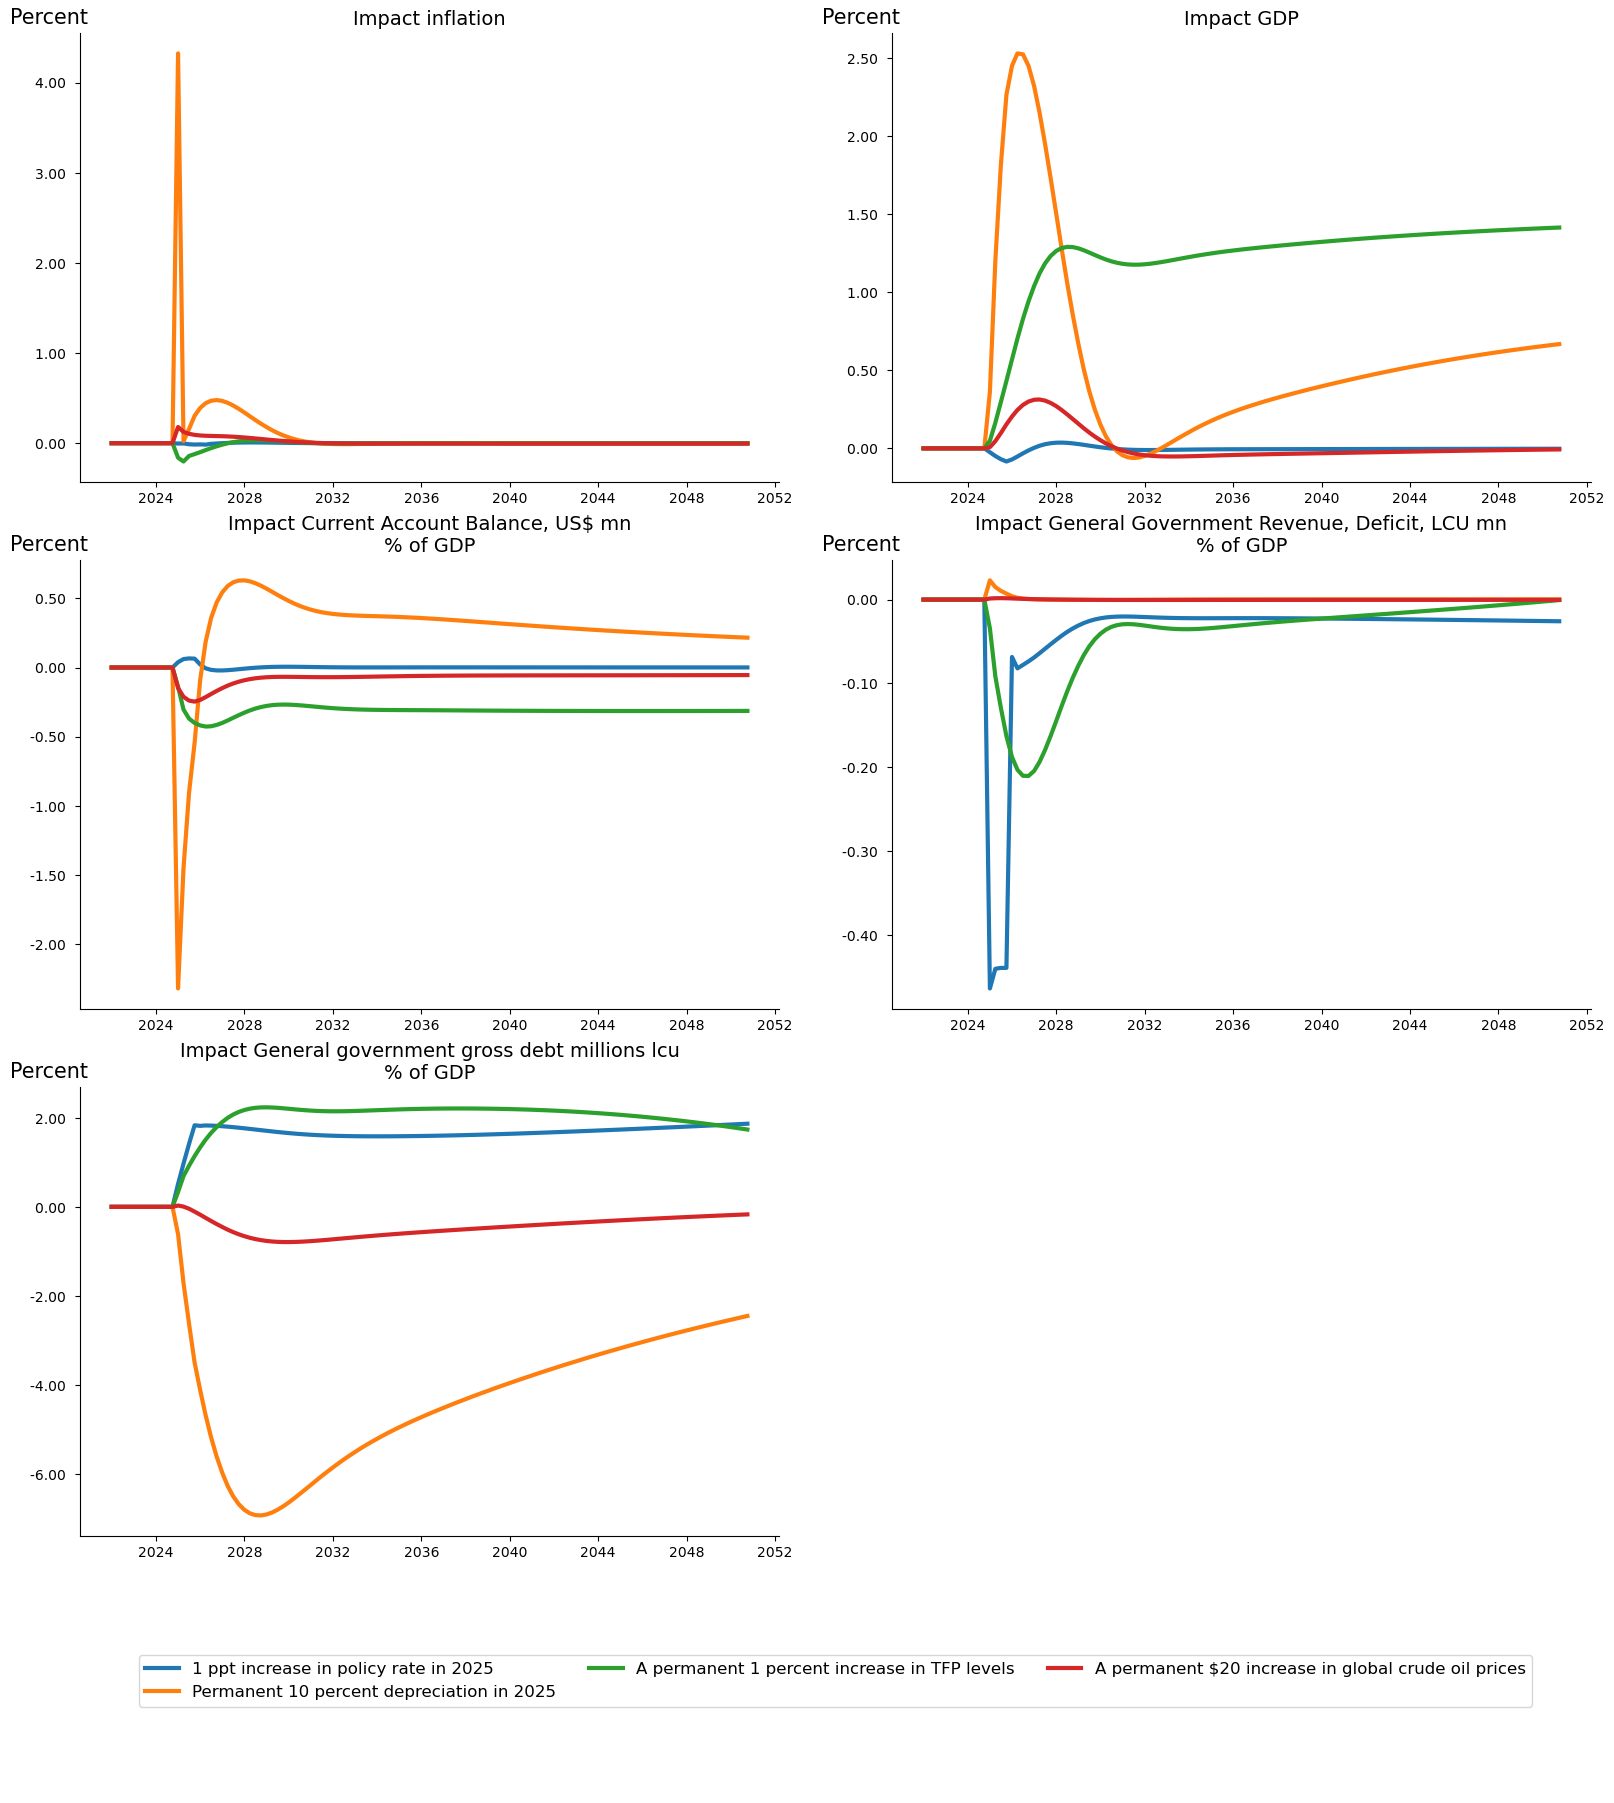

In [49]:
fig_non_financial  = fig_impact_inflation | fig_impact_gdp | fig_impact_non_fiscal_gdppct
    
fig_non_financial.set_options(samefig=True,legend=True,ncol=2,size=(8,6)).show      

As might be expected, effects across these scenarios are more divergent.  

**Inflation**
Higher oil prices and an exchange rate depreciation both are inflationary at least in the short-run.  The inflation impact in the oil scenario is much smaller than in the depreciation scenario and dissipates quite rapidly  as the economy adjusts. In contrast , **there appears to be a permanent increase in inflation in the exchange rate scenario -- odd.**

Both the TFP shock and the monetary policy tightening contribute to declines in inflation.  The TFP shock is deflationary because it raises potential output and therefore open up a negative output gap, at least initially.  Over time this effect diminished but does not seem to go away **(odd)**. In contrast the monetary policy shock which also induces an increase in the output gap (due to lower demand) in the short run, tends to recover its pre-shock inflation rate.

The permanent increase in TFP translates fairly quickly into higher GDP, and GDP continues to rise -- reflecting stronger potential output.  While the initial increase in TFP will have boosted potential, the subsequent increase reflects higher investment induced by the increased productivity of capital (and labor).




#### Real GDP impacts of non-fiscal simulations

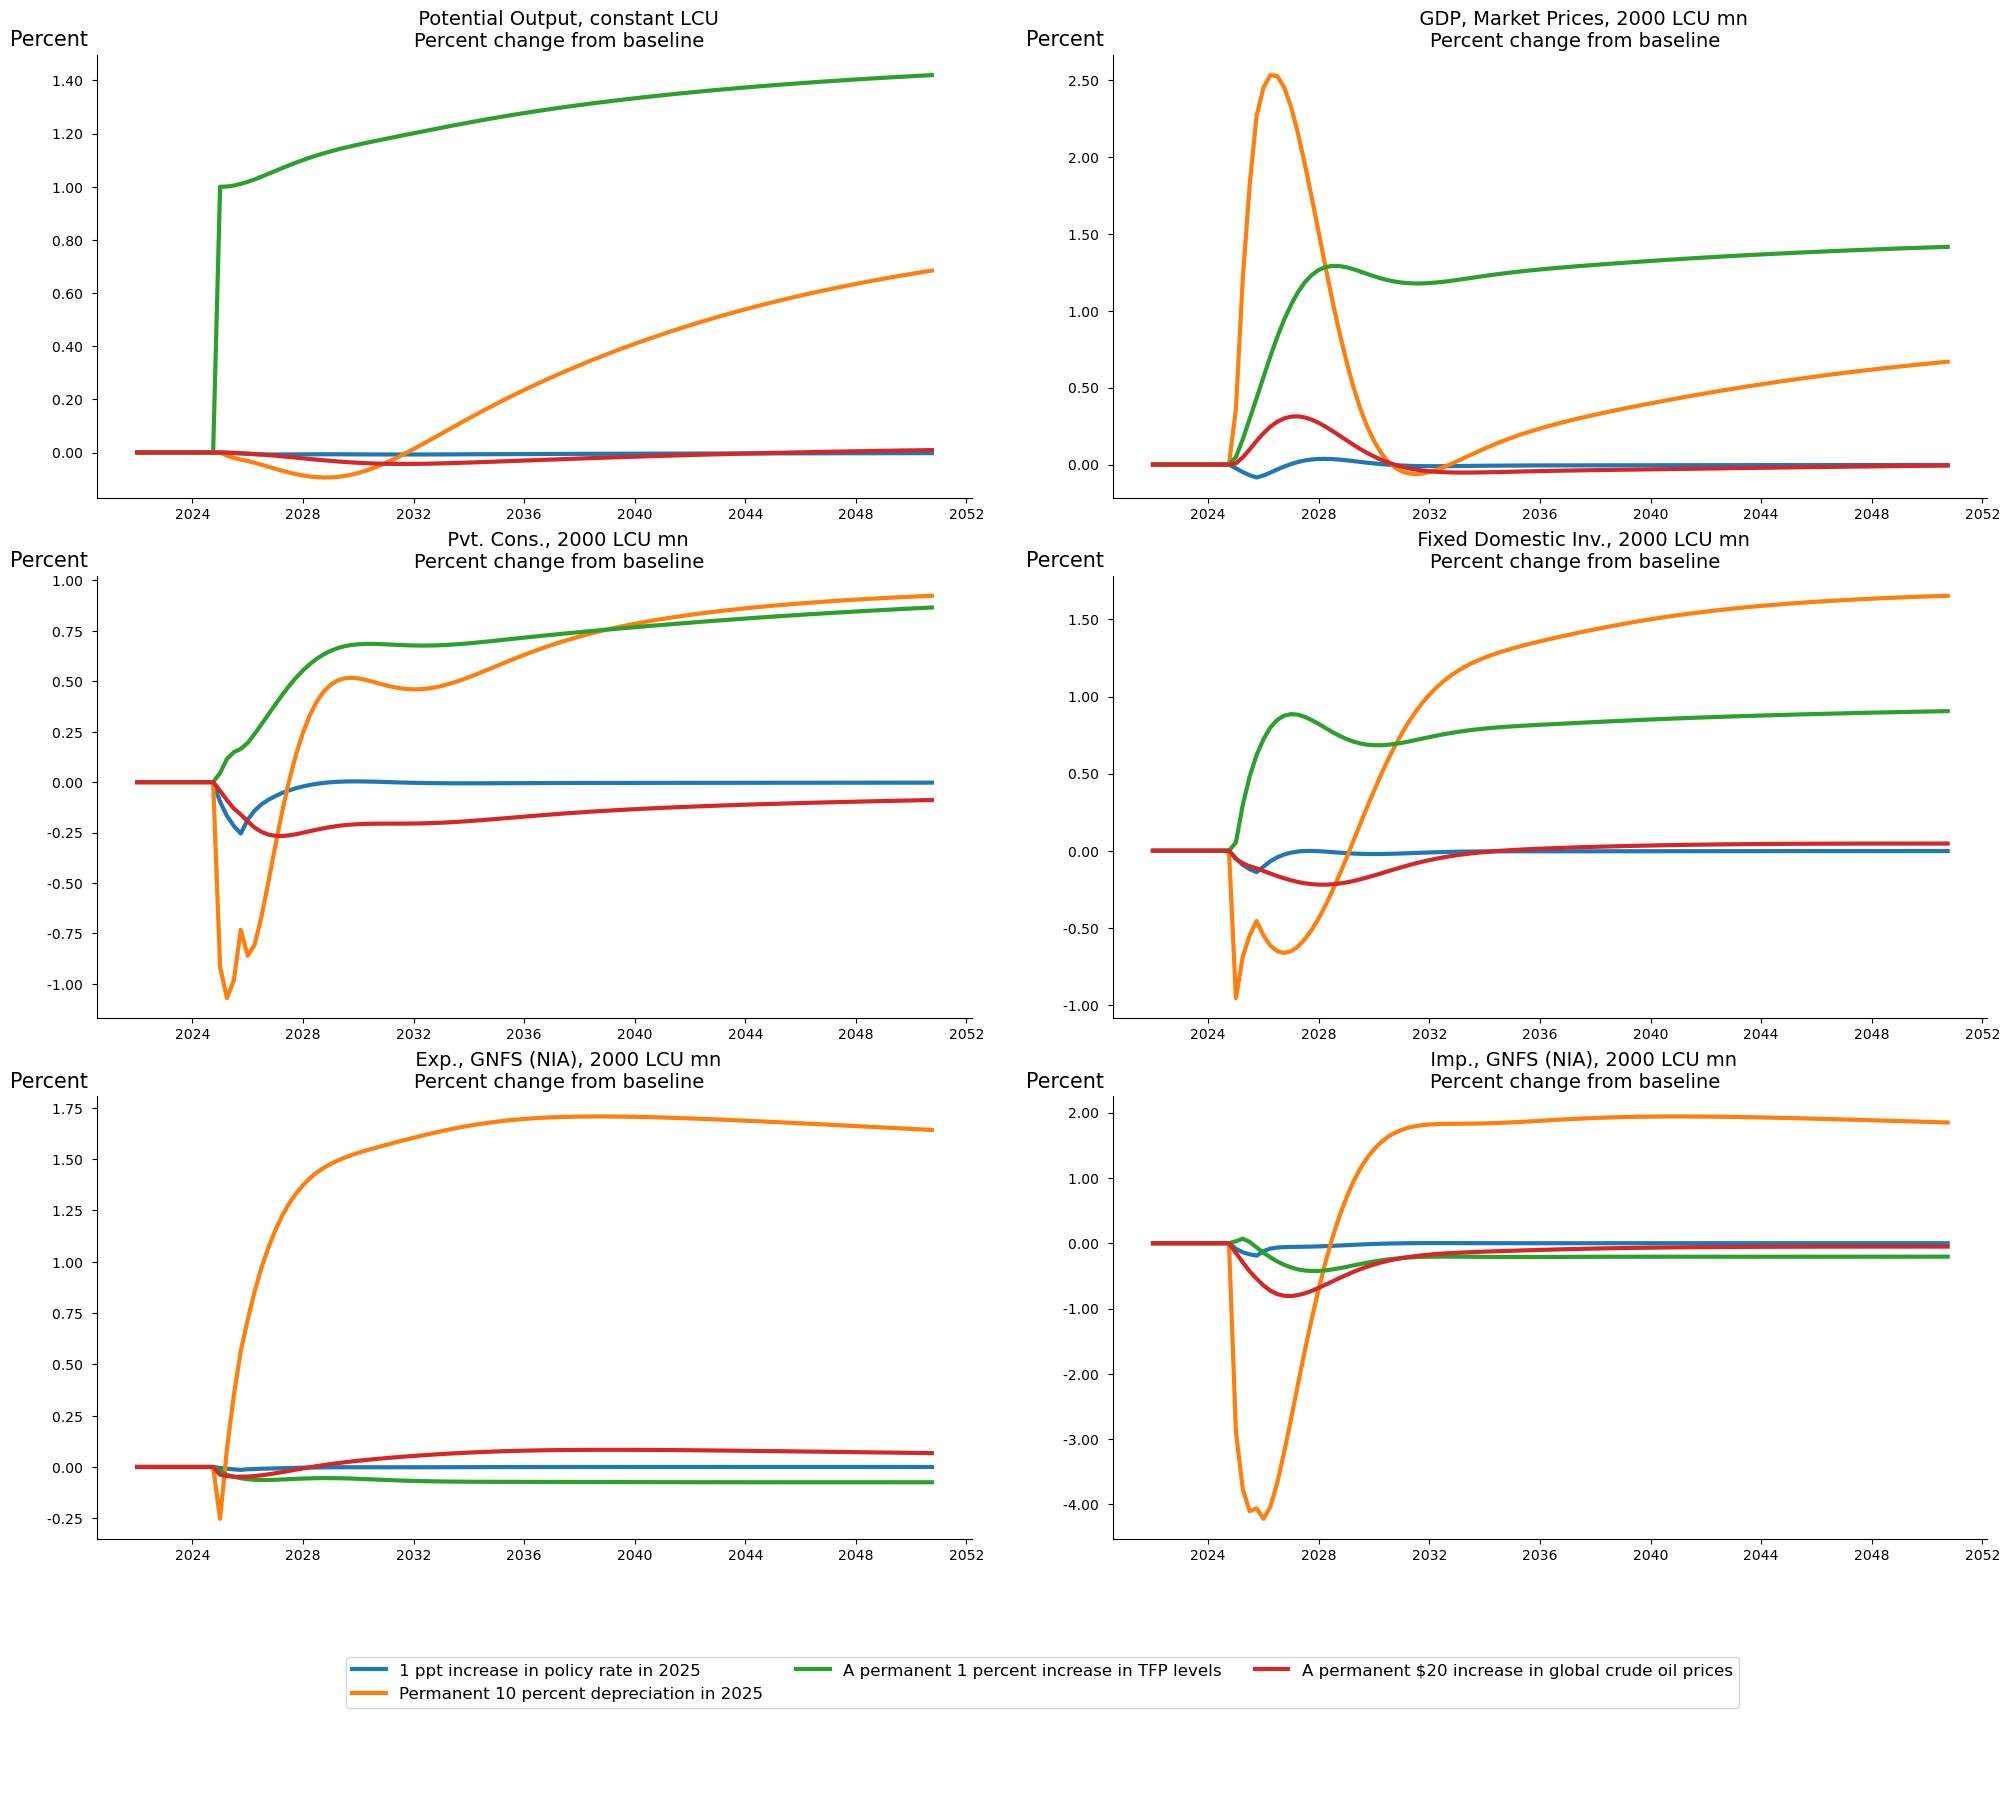

In [50]:
fig_impact_real_gdp = themodel.plot(
                              pat= f'{cty}NYGDPPOTLKN {cty}NYGDPMKTPKN {cty}NECONPRVTKN {cty}NEGDIFTOTKN ' 
                                    '{cty}NEEXPGNFSKN {cty}NEIMPGNFSKN',
                              datatype='difpctlevel',
                              scenarios = scenarios_non_fiscal,
                              ax_title_template = '           {var_description}\n'
                                                  '        Percent change from baseline',
                              samefig=True,
                              legend=True,
                              name='expenditure')
fig_impact_real_gdp.show

#### Discussion of real GDP impacts of non-fiscal scenarios

##### The TFP shock (orange line)
Potential and real GDP impacts mirror one another, with the TFP shock raising potential output permanently, and with real GDP catching up slowly over time.  The potential GDP impact continues to rise over time because the higher output induces additional investment which adds further to potential GDP.  Higher potential and actual GDP translates into increased consumption, exports and imports as the economy adjusts to the higher scale of activity.

##### The monetary policy shock (blue line)
As can be expected a tightening of monetary policy has negative effects on GDP. Higher interest rates and slower growth reduce investment growth which has a modest negative effect on potential output and long-run GDP. Consumer demand mirrors GDP as incomes are reduced modestly as compared with the baseline.  Exports are hurt initially due to high capital costs, but as inflation declines they benefit and by the end of the period the impact is negligible.  Imports are similarly hurt initially but recover most of the losses,  They remain lower than baseline in line with lower domestic demand and GDP.

##### Oil price hike (green line)

A permanent $20 nominal increase in oil prices has modest impacts on GDP, increasing potential slightly in Indonesia an oil exporter as incomes rise allowing for a modest increase in investment and consumption.  Real non-oil exports decline, mainly because of price effects induced by the additional spending that the higher oil revenues enable, which are in turn reflected in a modest decrease in import volumes.

##### Depreciation scenario

Not performed as Croatia is a member of the Euro zone and does not have the option of depreciating its currency.


### Fiscal impacts of non-fiscal scenarios

While the TFP, Monetary policy and exchange rate shocks modelled in this section do not have any direct impact on fiscal policy, they do have indirect effects.

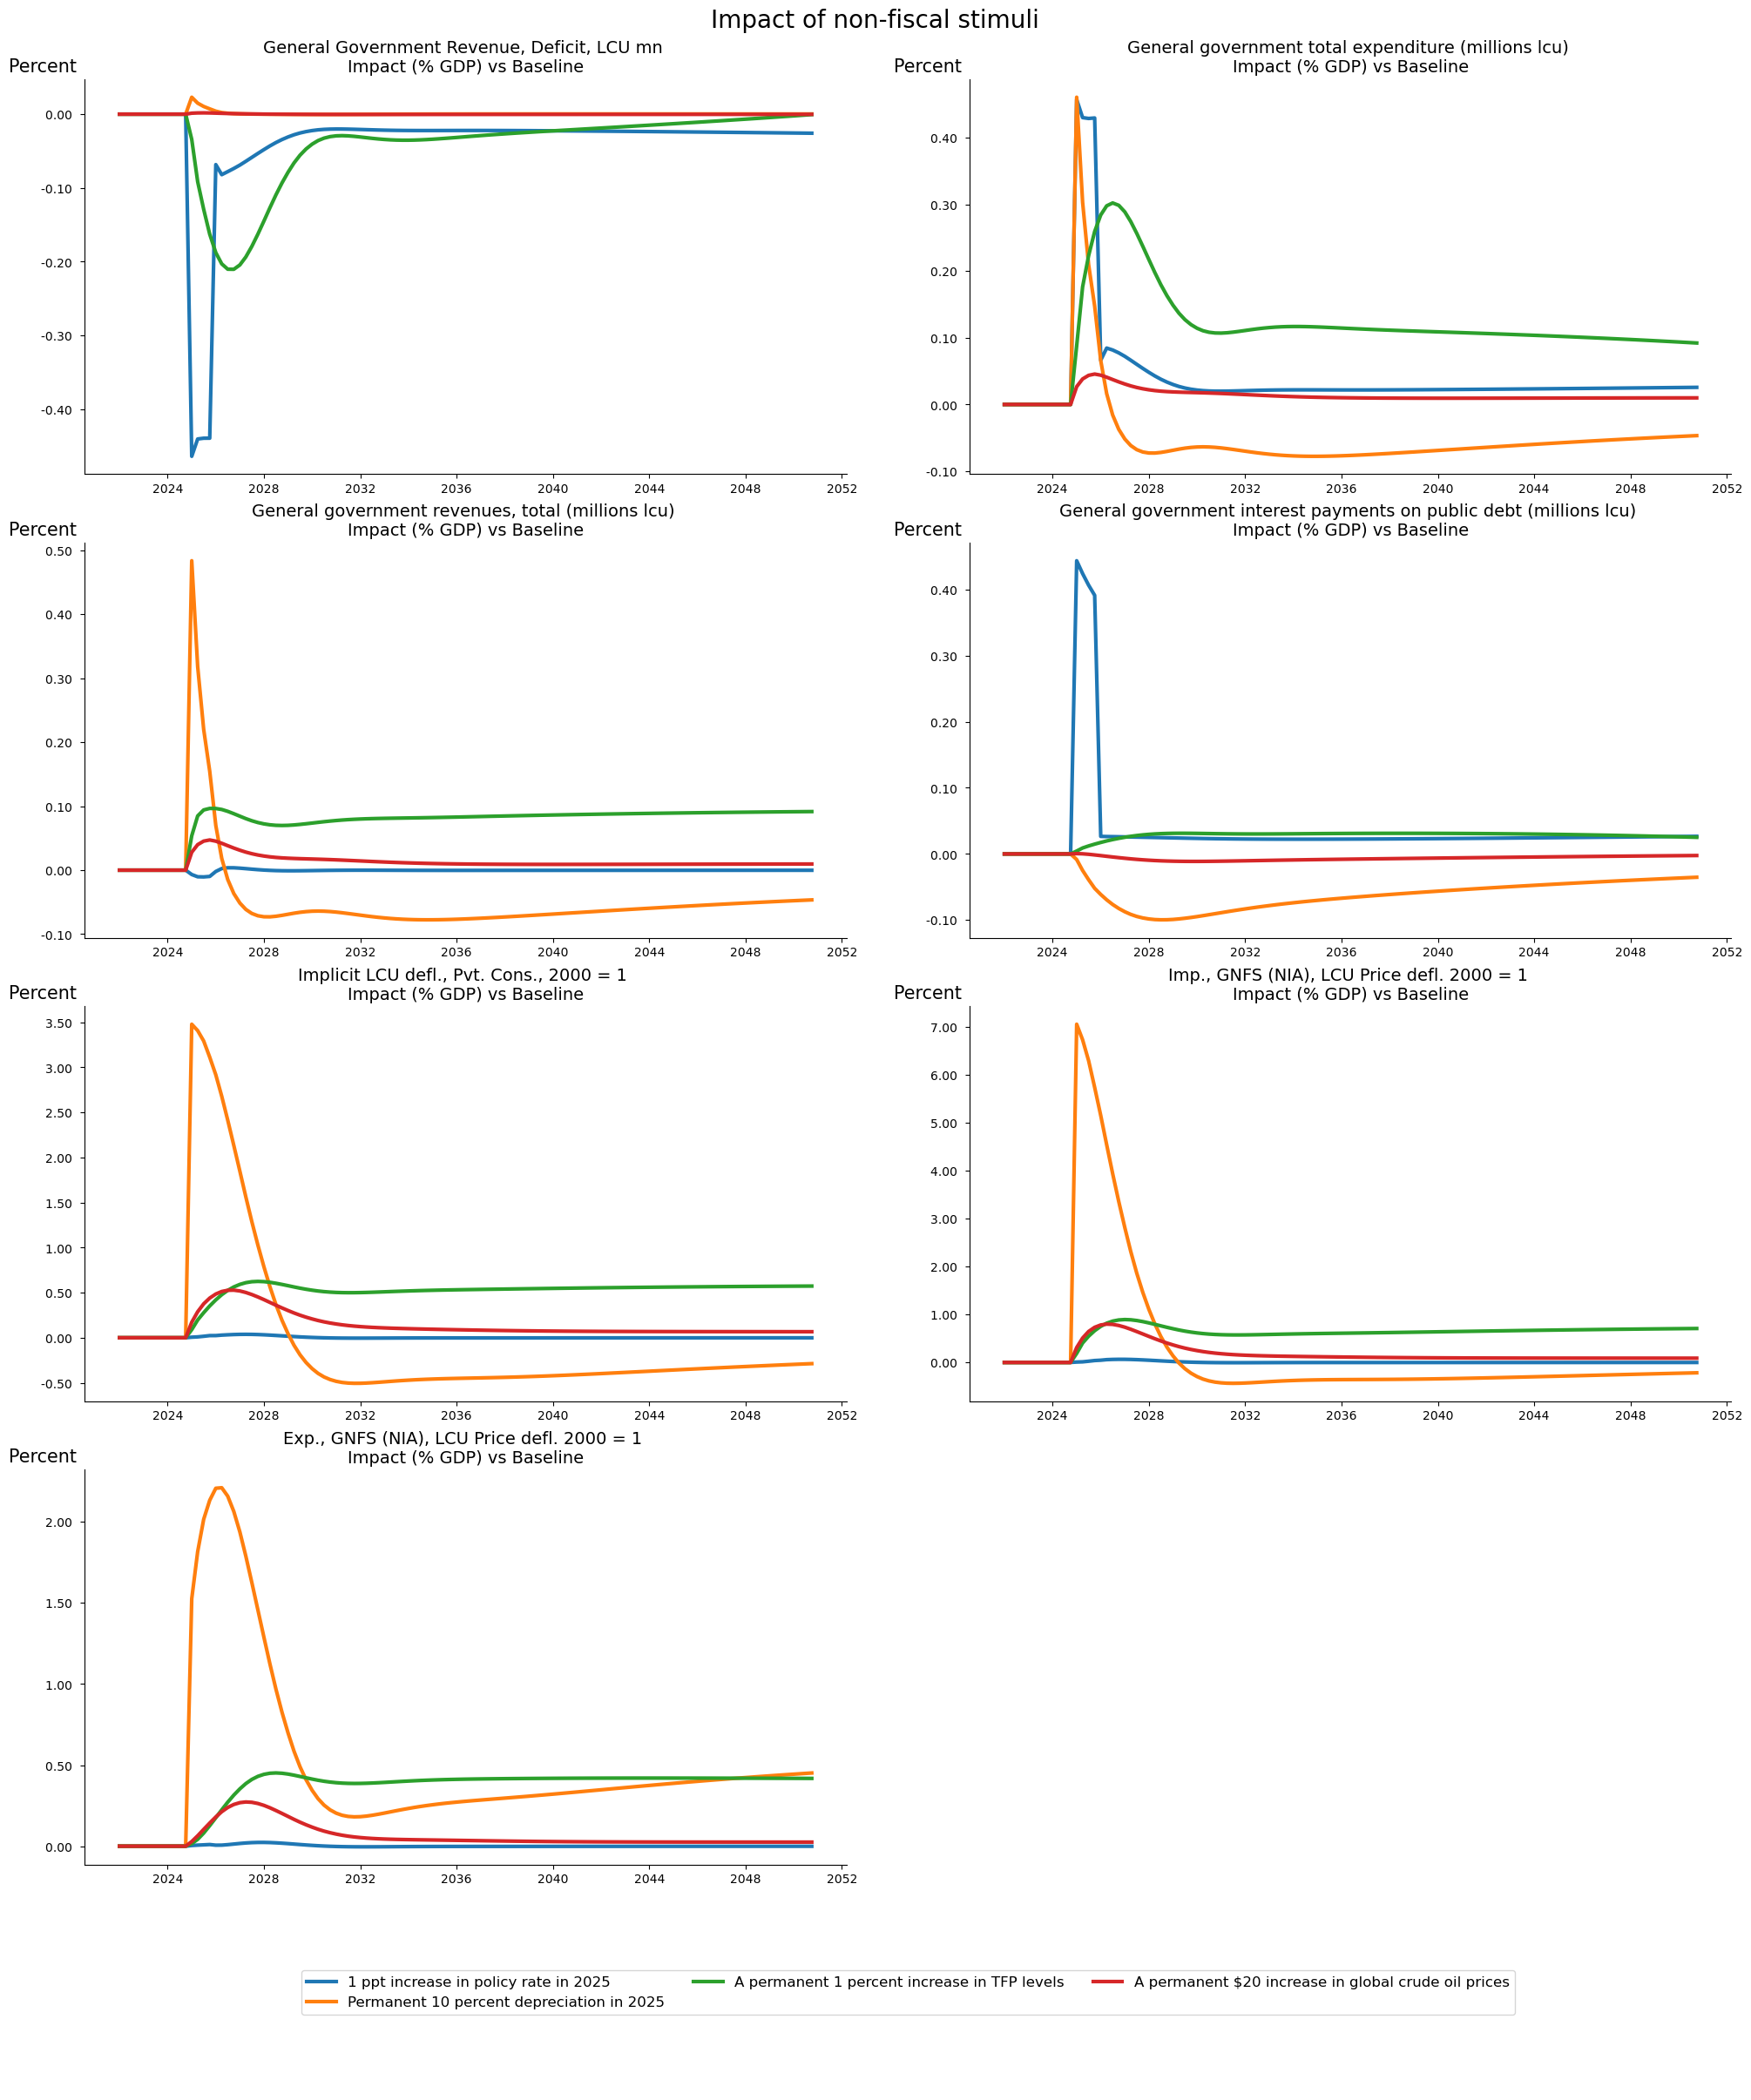

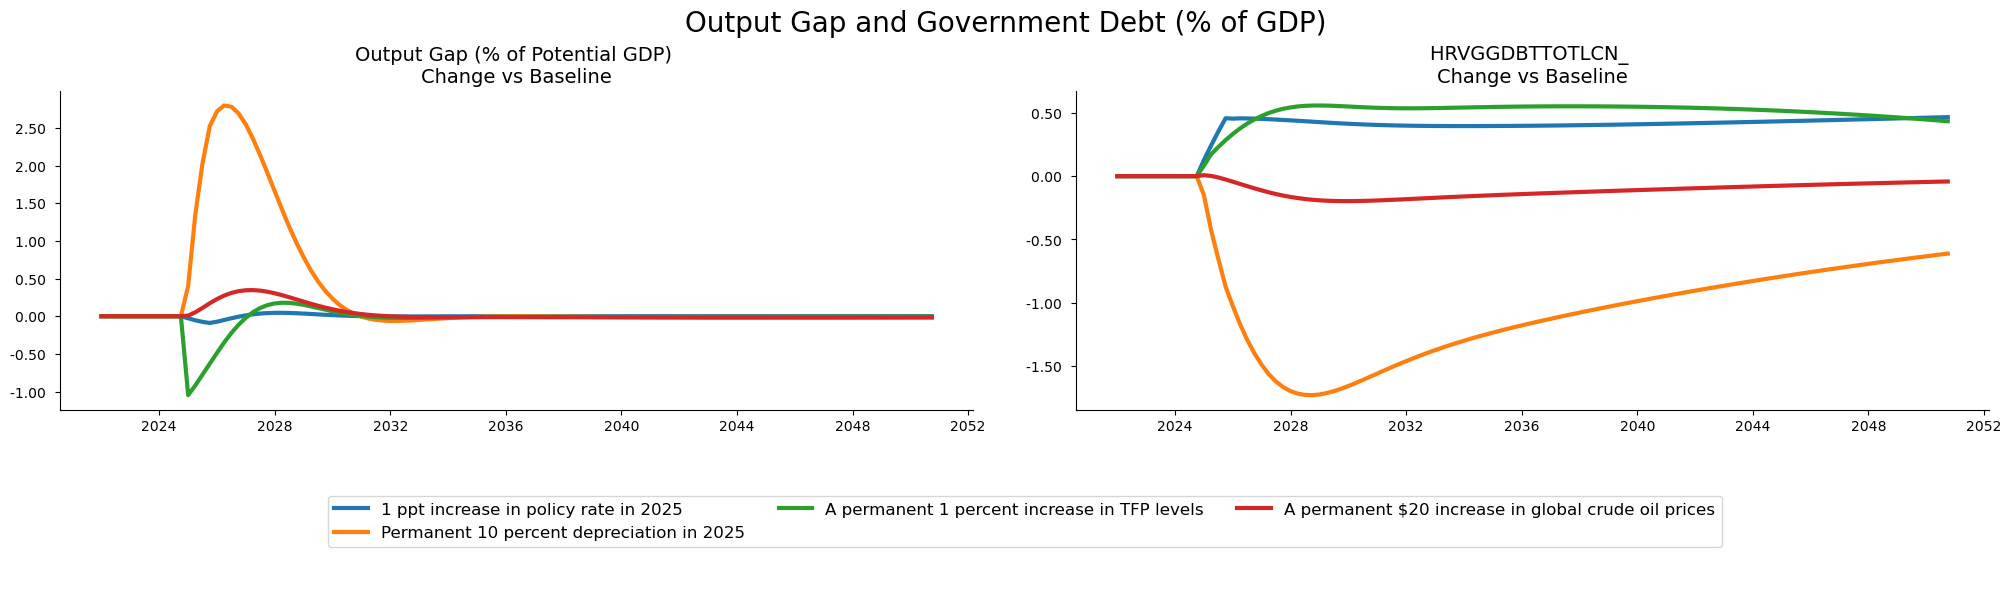

In [51]:
gdp_pct_pat =f'{cty}GGBALOVRLCN {cty}GGEXPTOTLCN {cty}GGREVTOTLCN  {cty}GGEXPINTPCN '\
            '{cty}GGBALOVRLCN  {cty}NYGDPGAP'     
fig_gdp_pct_non_fiscal = themodel.plot(
                        scenarios=scenarios_non_fiscal, 
                        pat = gdp_pct_pat,
                        datatype='difgdppct',
                        name='Comparing other stimulus impacts',
                        title="Impact of non-fiscal stimuli",
                        samefig=True,
                        legend=True)

cpi_pct_pat =       f'{cty}NECONPRVTXN {cty}NEIMPGNFSXN {cty}NEEXPGNFSXN'     
fig_cpi_pct_non_fiscal = themodel.plot(
                        scenarios=scenarios_non_fiscal, 
                        pat = cpi_pct_pat,
                        datatype='difgdppct',
                        name='Comparing other stimulus impacts',
                        title="Impact of non-fiscal stimuli",
                        samefig=True,
                        legend=True)

fig_gap_non_fiscal = themodel.plot(
                        scenarios=scenarios_non_fiscal, 
                        pat = "HRVNYGDPGAP_ HRVGGDBTTOTLCN_",
                        datatype='diflevel',
                        name='Comparing other stimulus impacts',
                        title="Output Gap and Government Debt (% of GDP)",
                        samefig=True,
                        legend=True)

combo= fig_gdp_pct_non_fiscal | fig_cpi_pct_non_fiscal
combo.show
fig_gap_non_fiscal.show

Results are broadly in line with expectations.

Net fiscal impacts are small, mainly because fiscal levers are not being used directly, so impacts reflect automatic stabilizers.

